In [ ]:
library(tidyverse)

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("MOFA2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BiocVersion', 'MOFA2'

also installing the dependencies ‘matrixStats’, ‘RcppEigen’, ‘sitmo’, ‘filelock’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘plyr’, ‘png’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘MatrixGenerics’, ‘FNN’, ‘RSpectra’, ‘RcppAnnoy’, ‘irlba’, ‘RcppProgress’, ‘dqrng’, ‘dir.expiry’, ‘basilisk.utils’, ‘rhdf5’, ‘reshape2’, ‘pheatmap’, ‘cowplot’, ‘ggrepel’, ‘reticulate’, ‘HDF5Array’, ‘corrplot’, ‘DelayedArray’, ‘Rtsne’, ‘uwot’, ‘basilisk’


Old packages: 'cli', 'gargle', 'googledrive', 'openssl', 'Rcpp', 'testthat'



In [ ]:
load(url("ftp://ftp.ebi.ac.uk/pub/databases/mofa/scnmt_gastrulation/gastrulation_scnmt_mofa.RData"))

In [ ]:
head(MOFAmodel@samples_metadata)

sample                  plate               pass_rnaQC pass_metQC pass_accQC
1 E4.5-5.5_new_Plate1_E09 E4.5-5.5_new_Plate1 TRUE       FALSE      FALSE     
2 E4.5-5.5_new_Plate1_D09 E4.5-5.5_new_Plate1 TRUE          NA         NA     
3 E4.5-5.5_new_Plate1_G09 E4.5-5.5_new_Plate1 TRUE        TRUE       TRUE     
4 E4.5-5.5_new_Plate1_F09 E4.5-5.5_new_Plate1 TRUE          NA         NA     
5 E4.5-5.5_new_Plate1_A09 E4.5-5.5_new_Plate1 TRUE       FALSE      FALSE     
6 E4.5-5.5_new_Plate1_C09 E4.5-5.5_new_Plate1 TRUE        TRUE       TRUE     
  stage stage_lineage     group lineage     
1 E5.5  E5.5_Epiblast     E5.5  Epiblast    
2 E5.5  E5.5_ExE Endoderm E5.5  ExE Endoderm
3 E5.5  E5.5_Epiblast     E5.5  Epiblast    
4 E5.5  E5.5_ExE Endoderm E5.5  ExE Endoderm
5 E5.5  E5.5_Epiblast     E5.5  Epiblast    
6 E5.5  E5.5_Epiblast     E5.5  Epiblast

In [ ]:
ls()

[1] "MOFAmodel"

In [ ]:
library(MOFA2)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


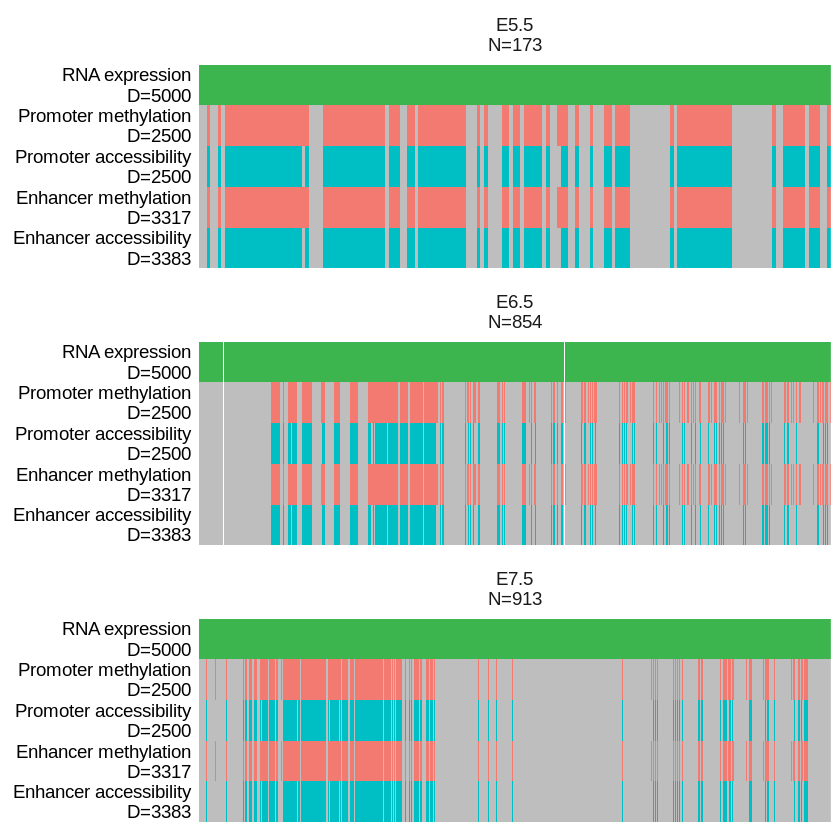

In [ ]:
view.colors <- c(
  "RNA expression" = "#3CB54E",
  "Enhancer accessibility" = "#00BFC4",
  "Promoter accessibility" = "#00BFC4",
  "Enhancer methylation" = "#F37A71",
  "Promoter methylation" = "#F37A71"
)
view.colors = view.colors[views_names(MOFAmodel)]

plot_data_overview(MOFAmodel, colors = view.colors)

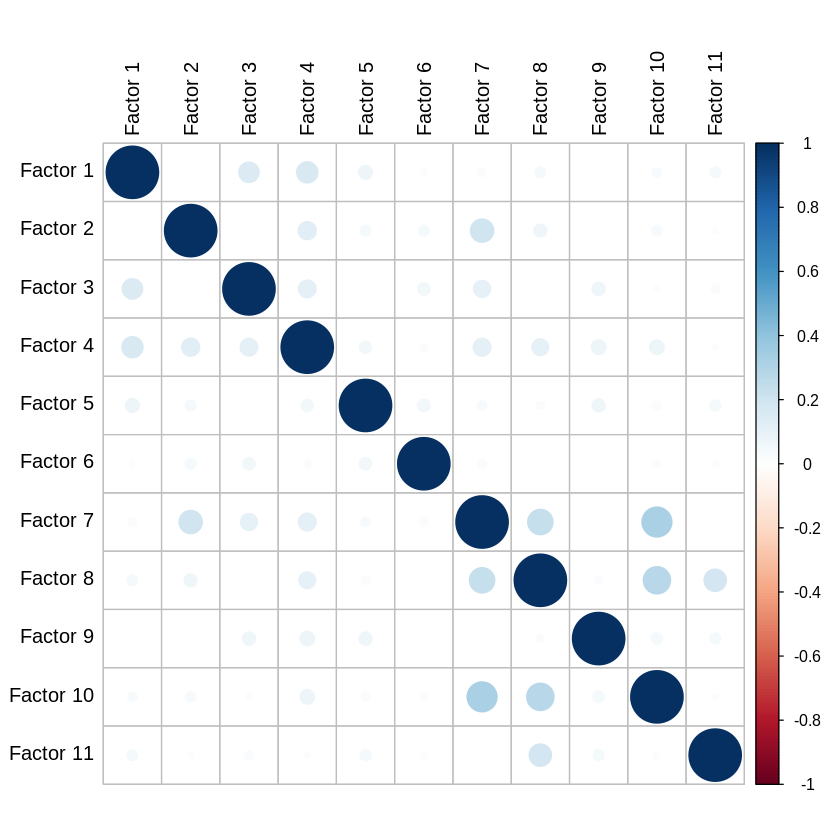

In [ ]:
cor <- plot_factor_cor(MOFAmodel)

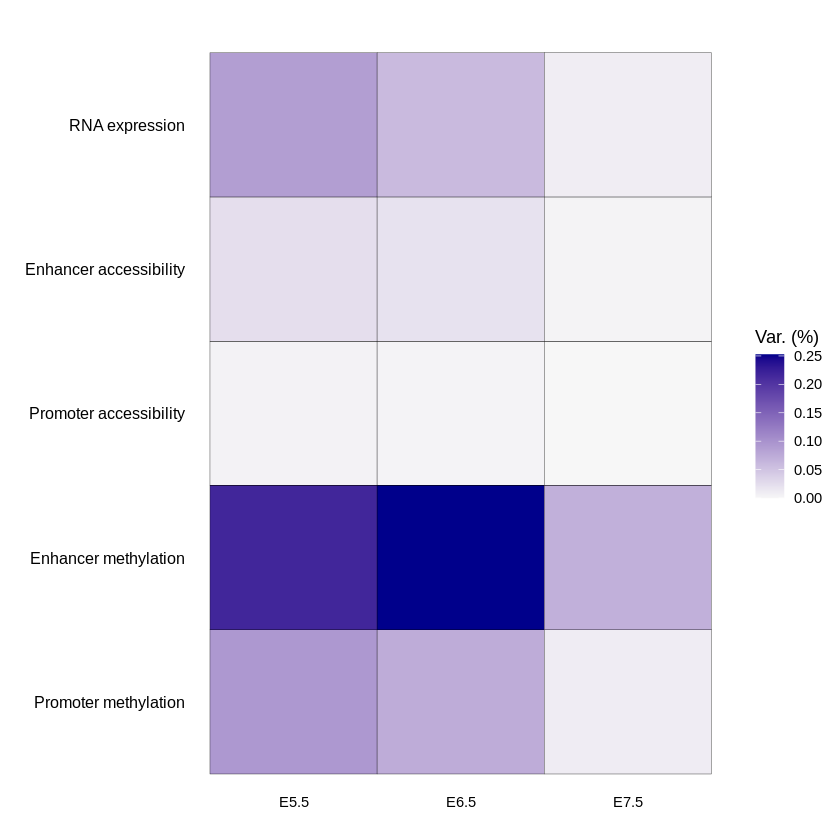

In [ ]:
plot_variance_explained(MOFAmodel, x="group", y="view", factor=1, legend = T)

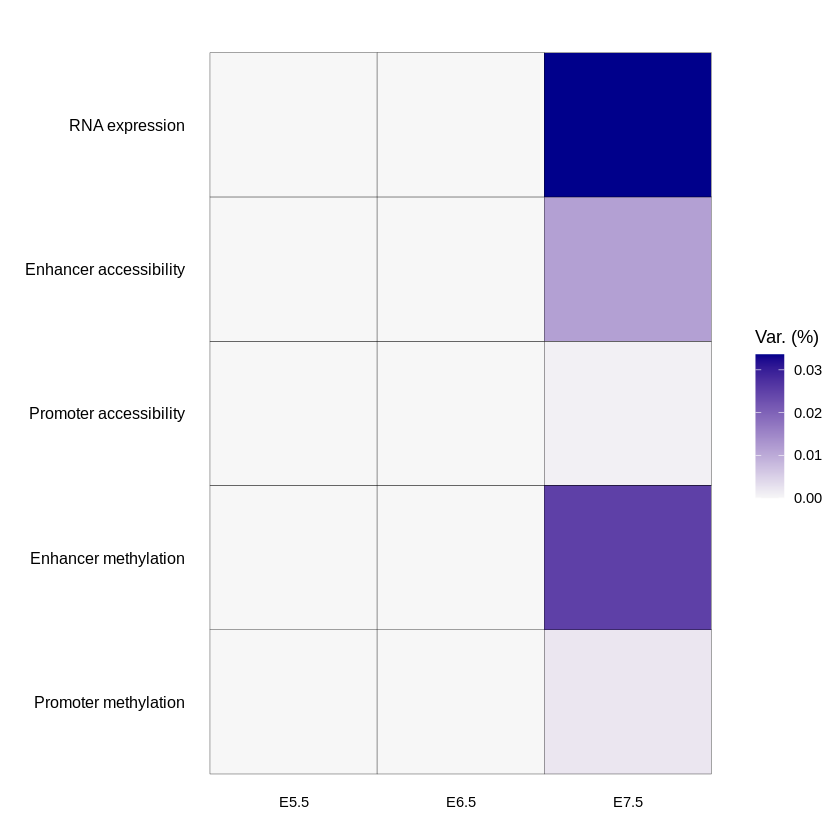

In [ ]:
plot_variance_explained(MOFAmodel, x="group", y="view", factor=2, legend = T)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


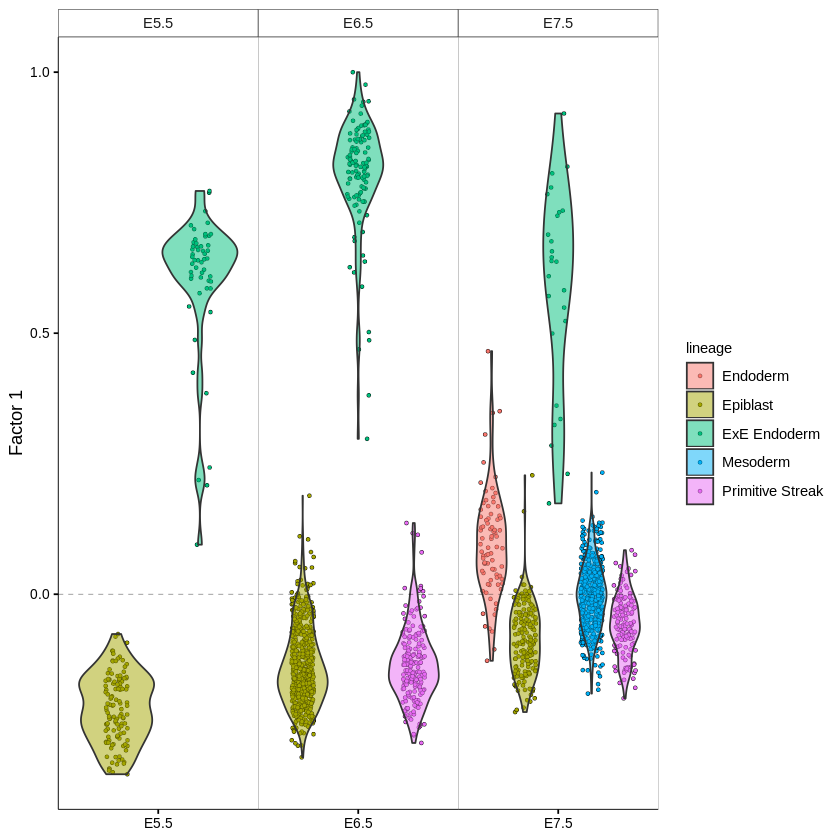

In [ ]:
plot_factor(MOFAmodel,
  factor = 1,
  color_by = "lineage", 
  scale = TRUE, 
  add_violin = TRUE, color_violin = TRUE, 
  dodge = TRUE, dot_size = 1, legend = TRUE
) 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


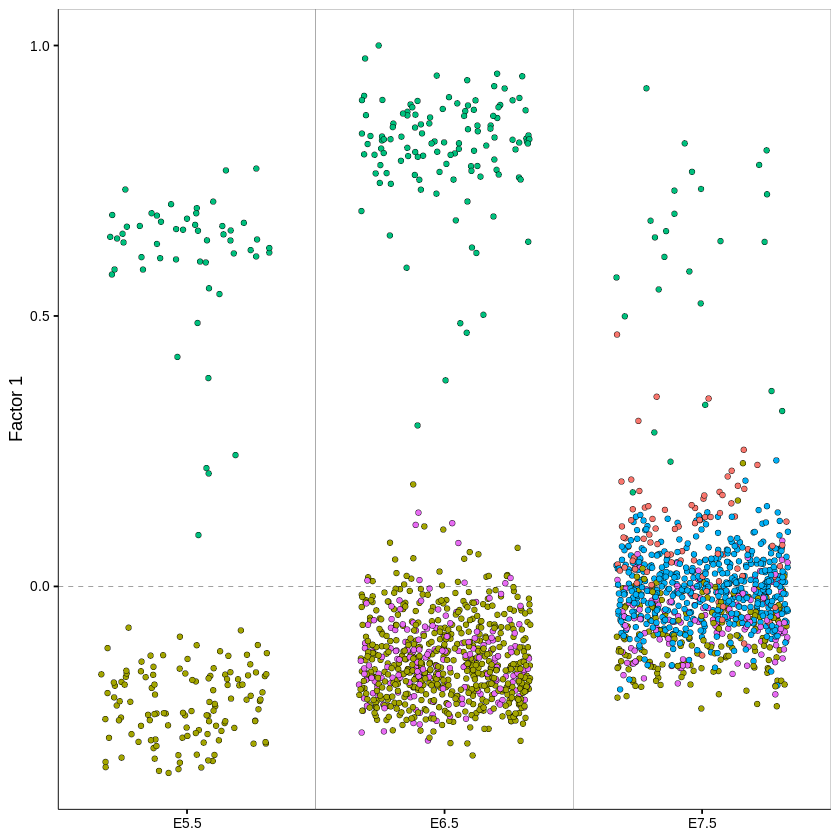

In [ ]:
plot_factor(MOFAmodel,
  factor = 1,
  color_by = "lineage", 
  dot_size = 1.5,
  scale = TRUE, legend = FALSE
) 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


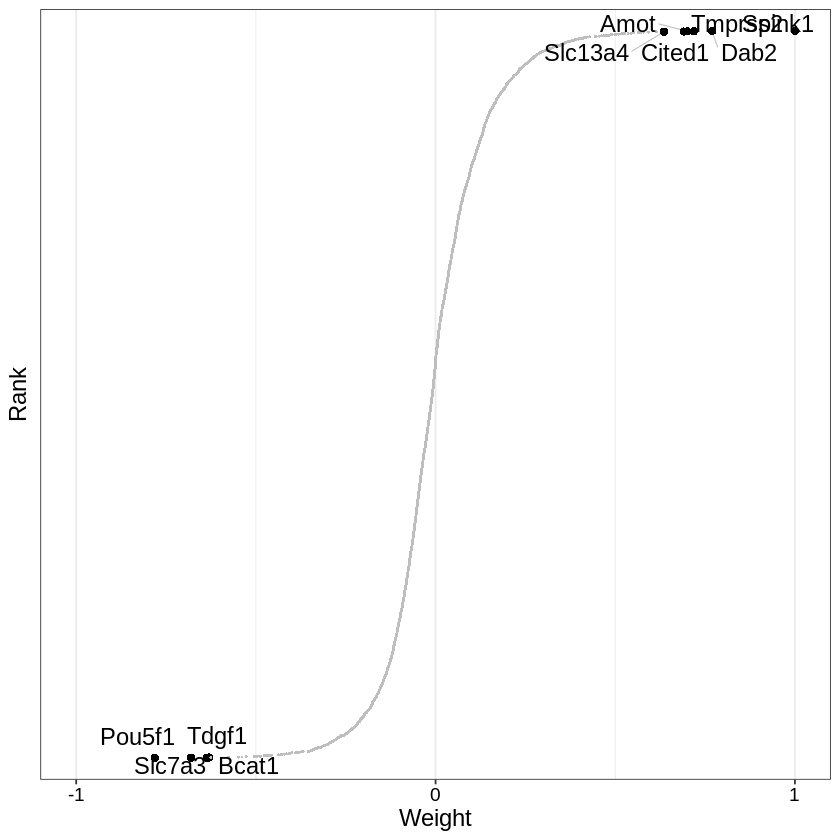

In [ ]:
plot_weights(MOFAmodel,
  view = "RNA expression",
  factor = 1,
  nfeatures = 10,     # Top number of features to highlight
  scale = T           # Scale weights from -1 to 1
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


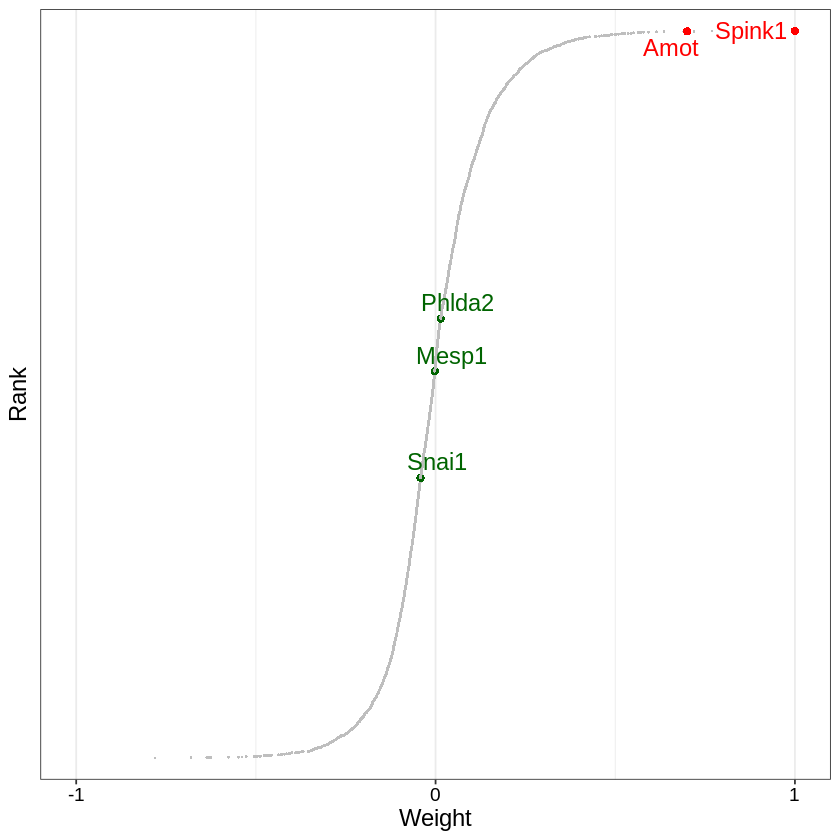

In [ ]:
plot_weights(MOFAmodel,
  view = "RNA expression",
  factor = 1,
  nfeatures = 5,
  manual = list(c("Snai1","Mesp1","Phlda2"), c("Spink1","Amot")),
  color_manual = c("darkgreen","red"),
  scale = T
)

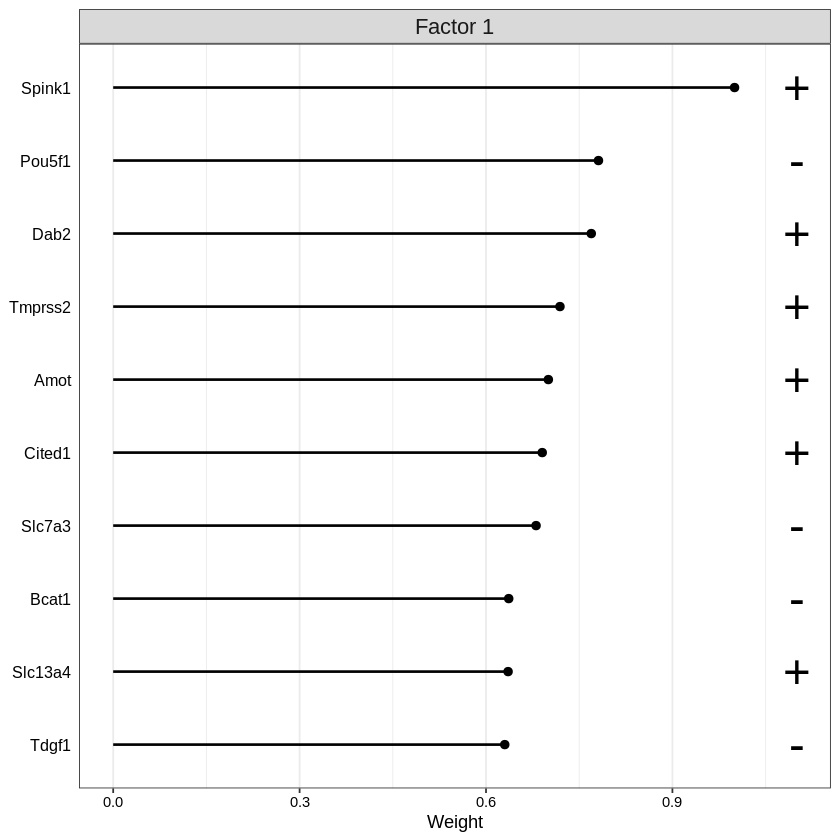

In [ ]:
plot_top_weights(MOFAmodel, 
  view = "RNA expression", 
  factor = 1, 
  nfeatures = 10,
  scale = T, 
  abs = T
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


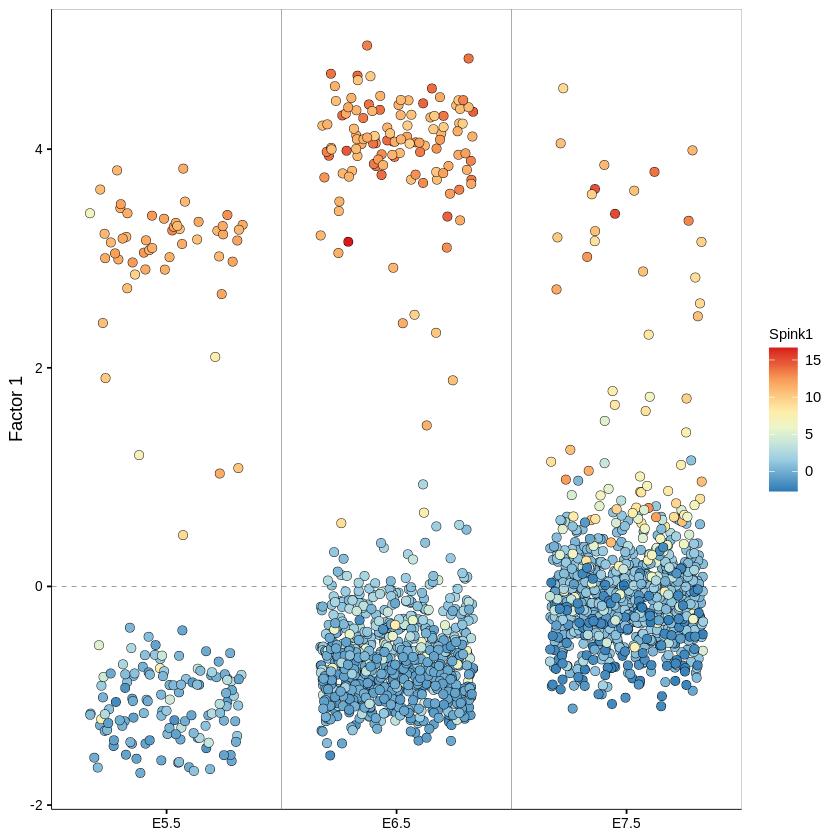

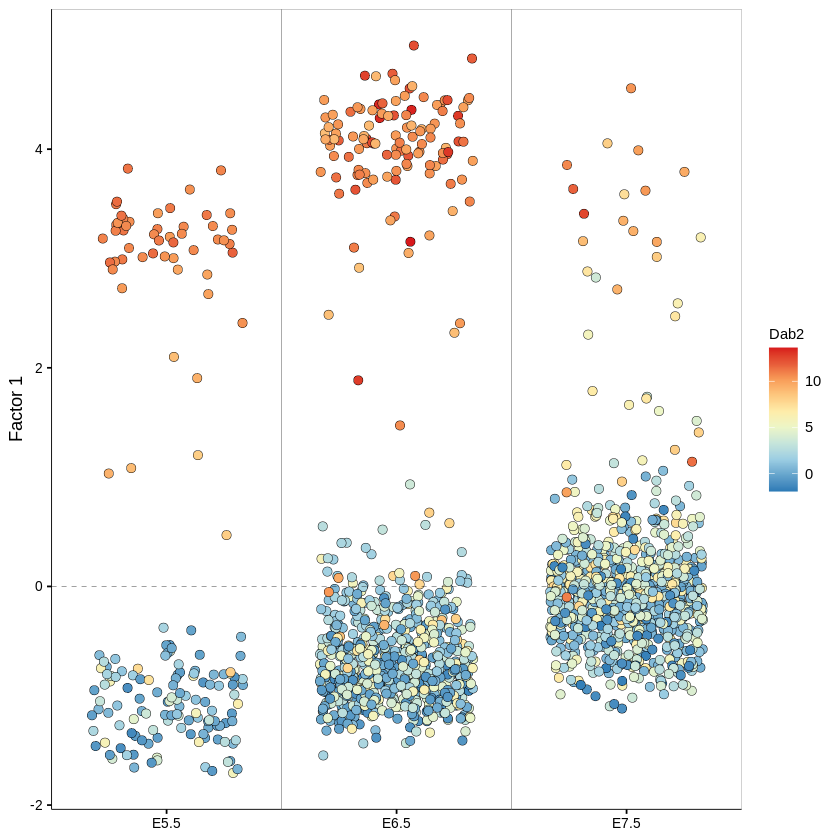

In [ ]:
genes <- c("Spink1","Dab2")

for (i in genes) {
  
  p <- plot_factor(MOFAmodel,
    factor = 1,
    dot_size = 2.5,
    color_by = i
  ) + scale_colour_gradientn(colours = terrain.colors(10)) # change color scale
  
  print(p)
  
}

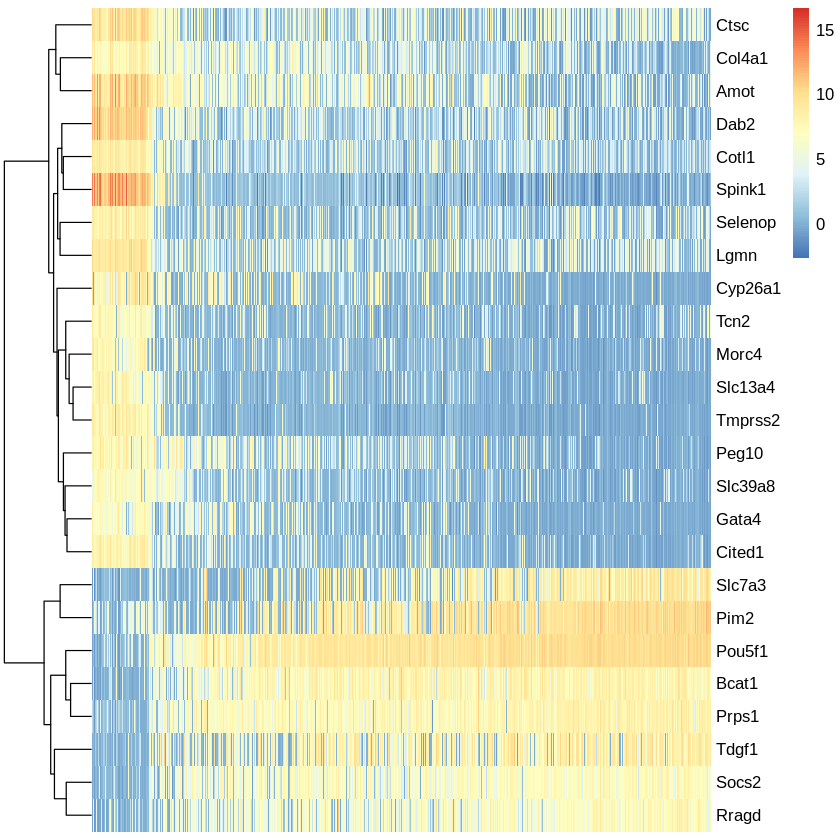

In [ ]:
plot_data_heatmap(MOFAmodel, 
  view = "RNA expression", 
  factor = 1, 
  features = 25,
  show_colnames = F, cluster_cols = F # extra arguments passed to `pheatmap`
)

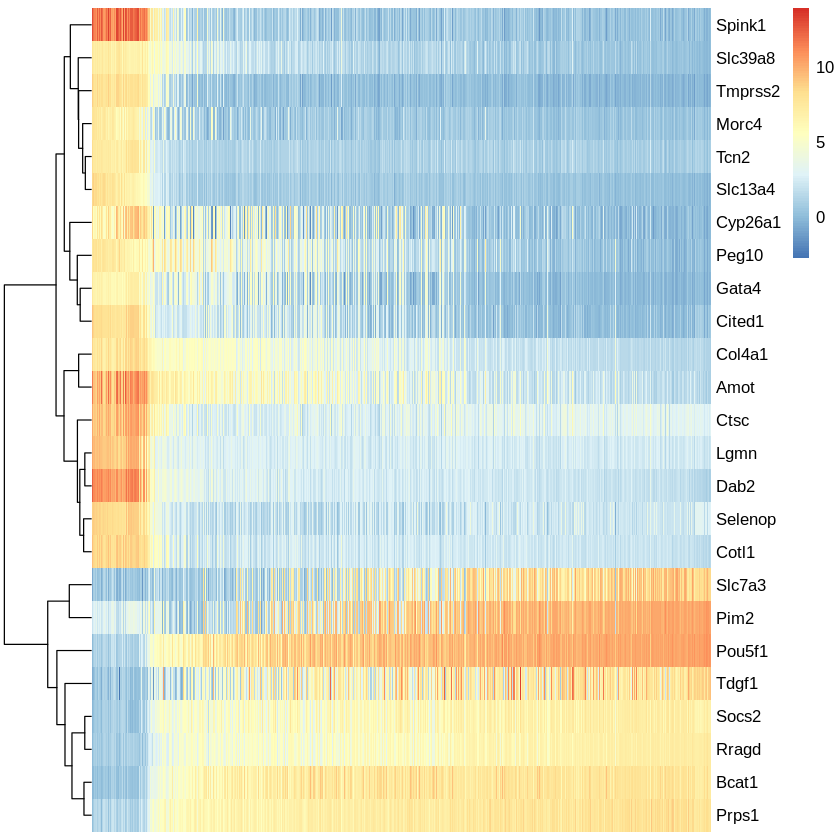

In [ ]:
plot_data_heatmap(MOFAmodel, 
  view = "RNA expression", 
  factor = 1, 
  denoise = TRUE,
  features = 25,
  show_colnames = F, cluster_cols = F # extra arguments passed to `pheatmap`
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


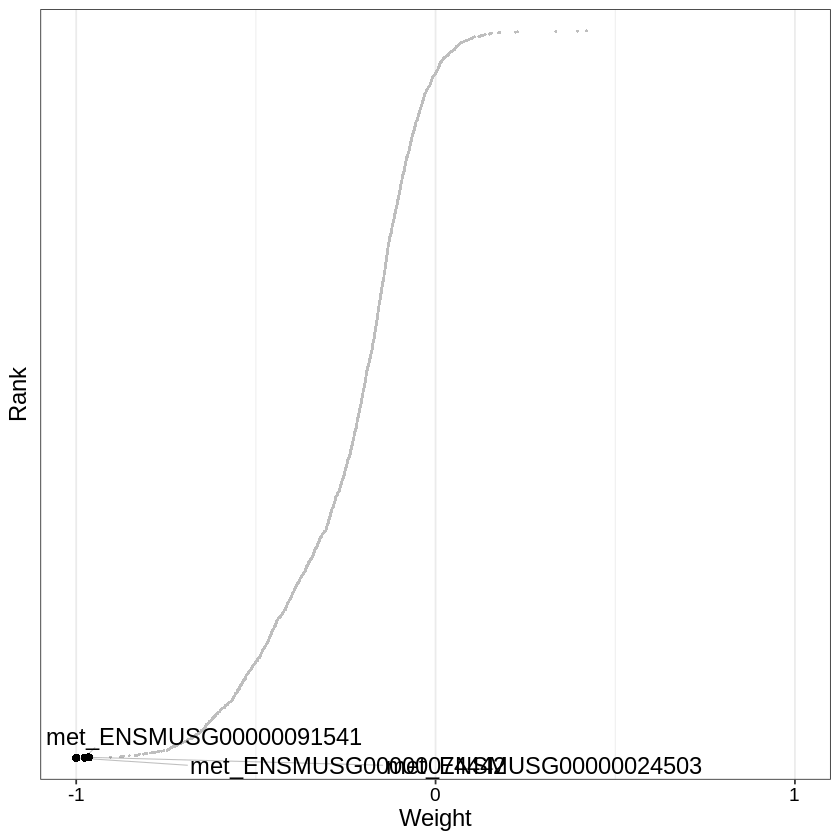

In [ ]:
plot_weights(MOFAmodel,
  view = c("Promoter methylation"),
  factor = 1,
  nfeatures = 3,
  scale = T
)

In [ ]:
MOFAmodel <- impute(MOFAmodel)

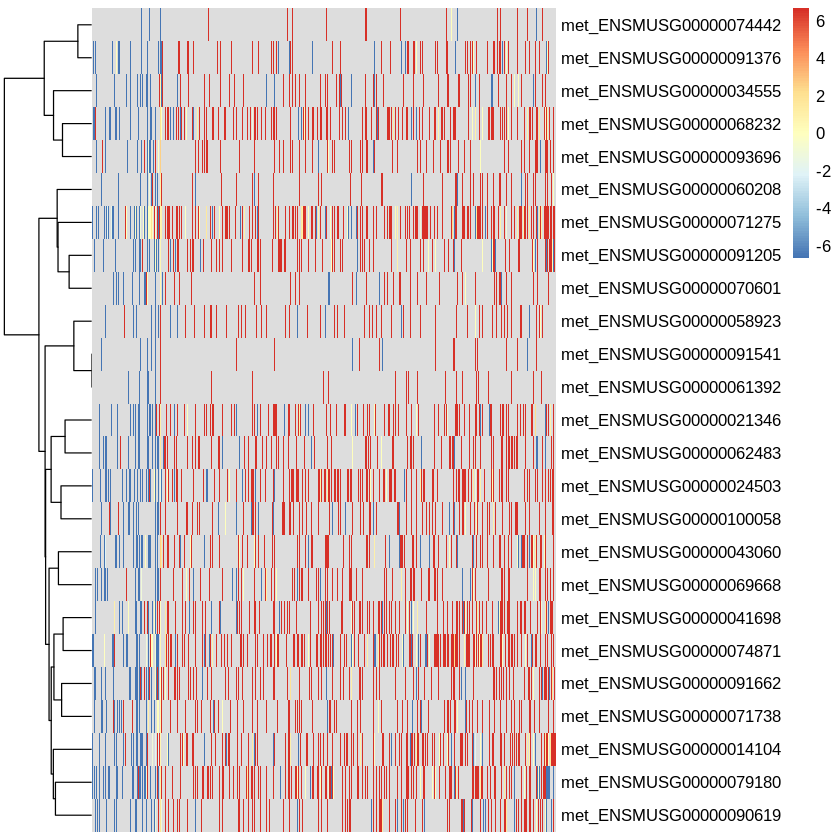

In [ ]:
plot_data_heatmap(MOFAmodel, 
  view = "Promoter methylation", 
  factor = 1, 
  impute = FALSE,
  features = 25,
  show_colnames = F, cluster_cols = F # extra arguments passed to `pheatmap`
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


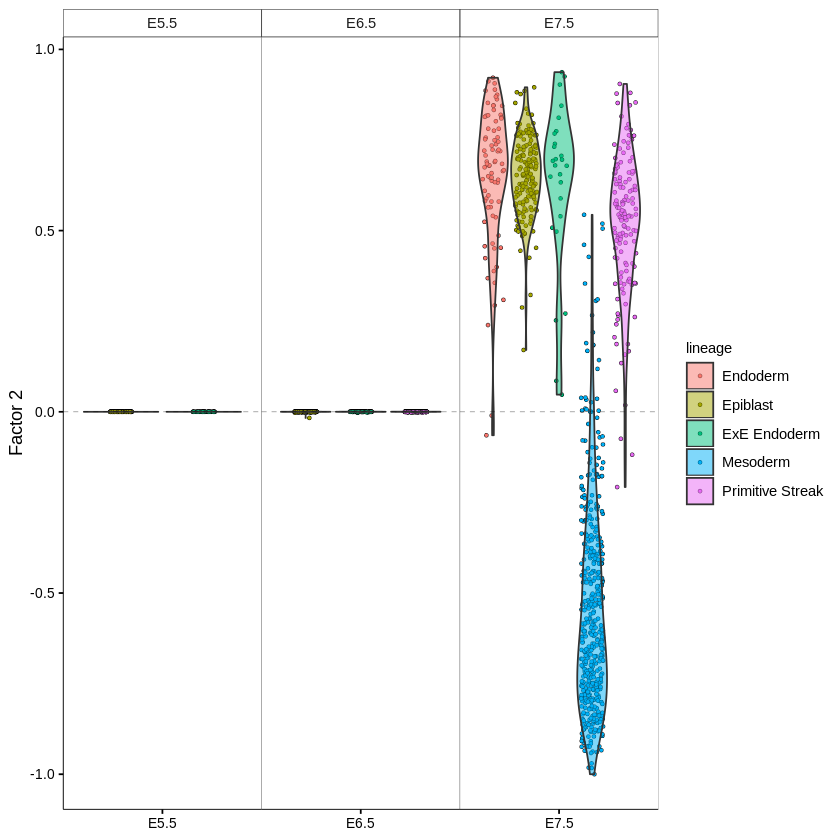

In [ ]:
plot_factor(MOFAmodel,
  factor = 2,
  color_by = "lineage", 
  scale = TRUE,
  add_violin = TRUE, color_violin = TRUE, 
  dodge = TRUE, dot_size = 1, legend = TRUE
) 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


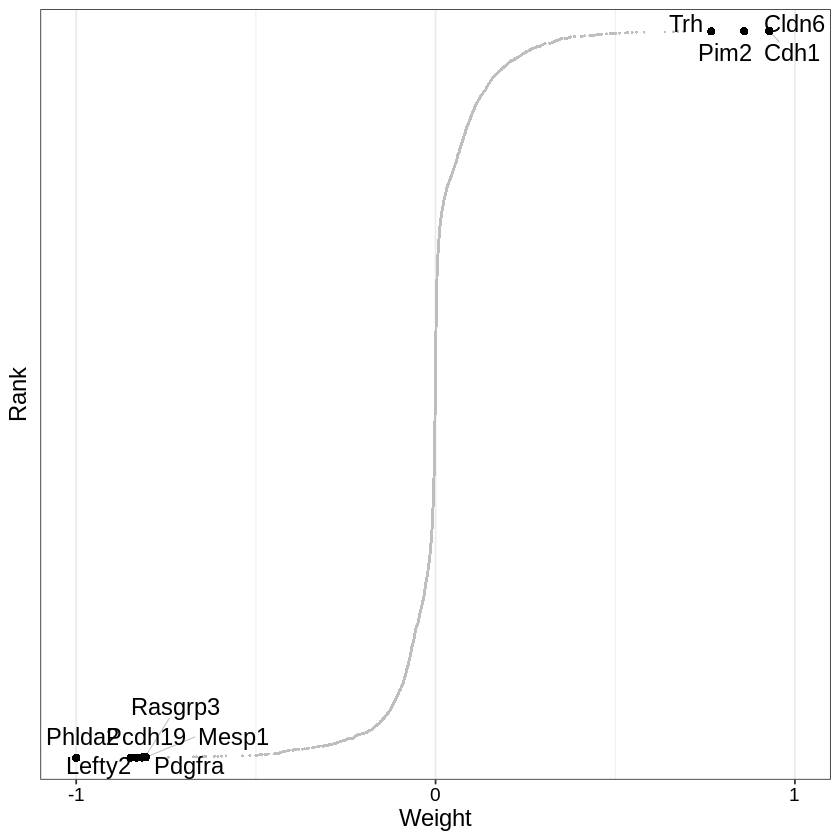

In [ ]:
plot_weights(MOFAmodel,
  view = "RNA expression",
  factor = 2,
  nfeatures = 10,     # Top number of features to highlight
  scale = T           # Scale weights from -1 to 1
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


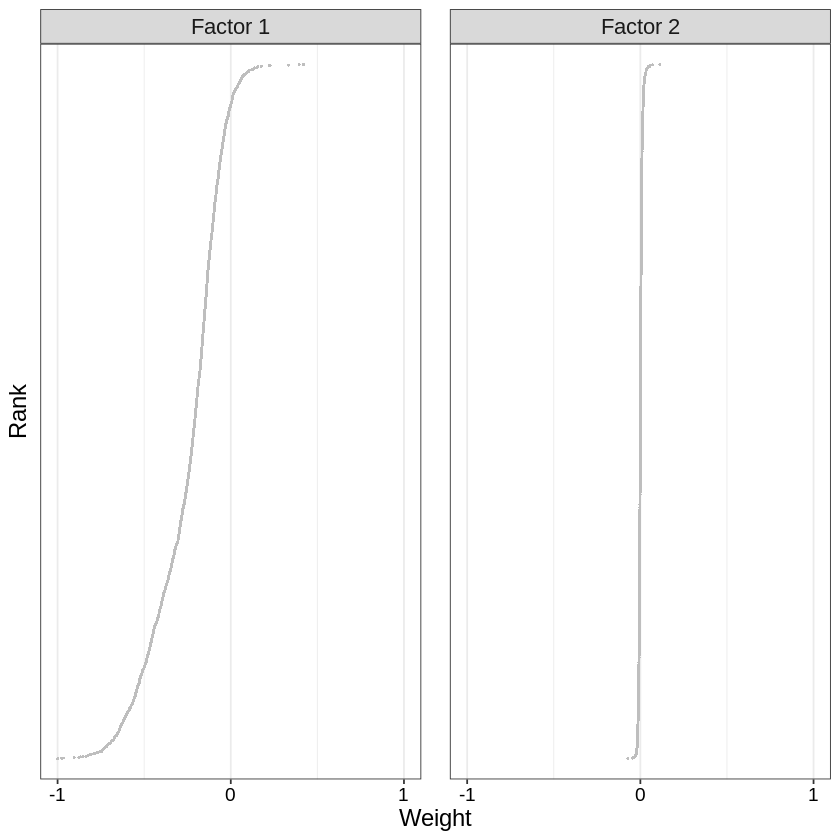

In [ ]:
plot_weights(MOFAmodel,
  view = c("Promoter methylation"),
  factor = 1:2,
  nfeatures = 0,
  scale = T
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


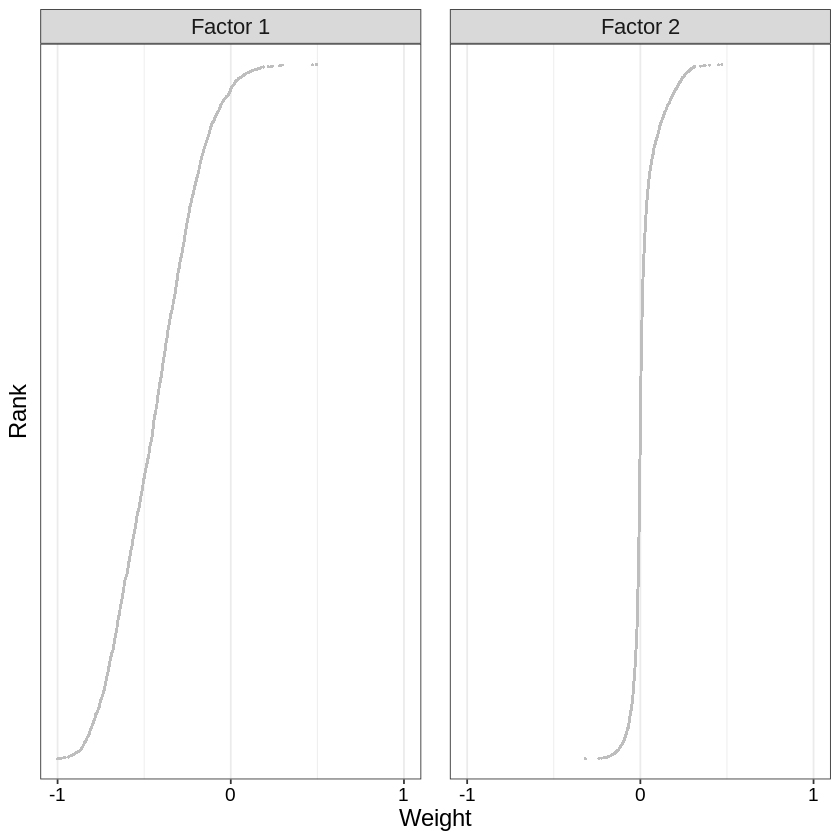

In [ ]:
plot_weights(MOFAmodel,
  view = c("Enhancer methylation"),
  factor = 1:2,
  nfeatures = 0,
  scale = T
)

In [ ]:
df <- MOFAmodel@samples_metadata[,c("sample","lineage")]
rownames(df) <- df$sample; df$sample <- NULL

plot_data_heatmap(MOFAmodel,
  view = c("Enhancer methylation"),
  factor = 2,
  impute = TRUE,
  features = 15,
  # extra arguments passed to `pheatmap`
  show_colnames = F, show_rownames = F, 
  annotation_samples = df,  annotation_colors = list("lineage"=colors),
  cluster_cols = F 
)

'annotation_samples' provided as a data.frame, please make sure that the rownames match the sample names



ERROR: ignored


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


`geom_smooth()` using formula 'y ~ x'



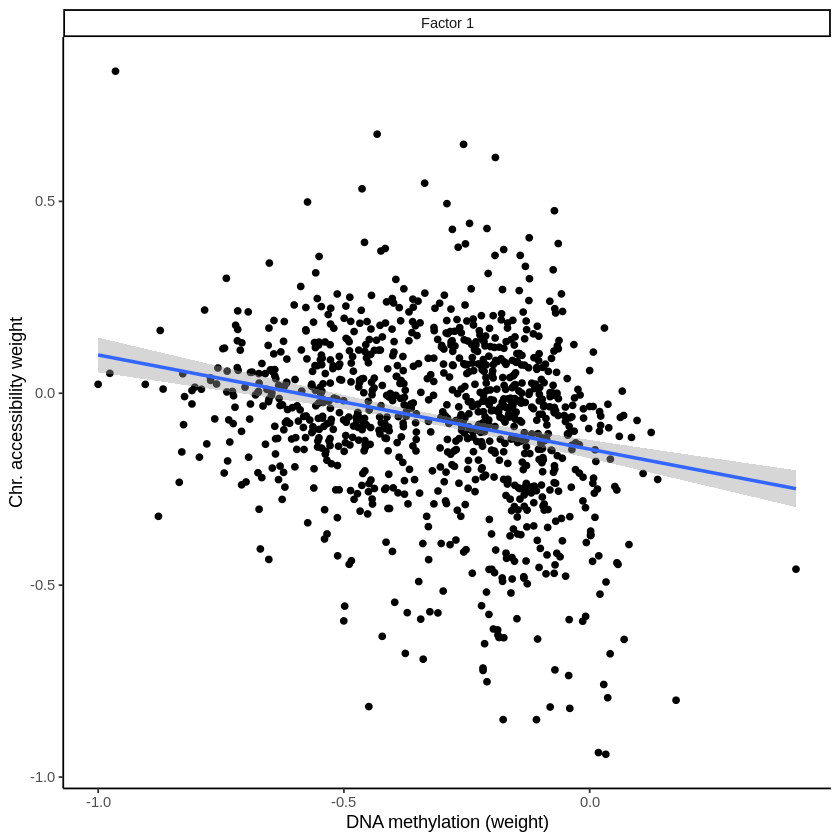

In [ ]:
library(data.table)
# Fetch weights
w.met <- get_weights(MOFAmodel, factors = 1, views = "Promoter methylation", as.data.frame=T) %>%
  as.data.table
w.acc <- get_weights(MOFAmodel, factors = 1, views = "Promoter accessibility", as.data.frame=T) %>%
  as.data.table

# Remove the met_ and acc_ prefix from the feature names
w.met[,feature:=substr(feature,5,nchar(as.character(feature)))]
w.acc[,feature:=substr(feature,5,nchar(as.character(feature)))]

# Scale the loadings 
w.met[,value:=value/max(abs(value))]
w.acc[,value:=value/max(abs(value))]

# Merge loadings
w.dt <- merge(
  w.met[,c("feature","factor","value")], 
  w.acc[,c("feature","factor","value")], 
  by=c("feature","factor")
)

ggplot(w.dt, aes(x=value.x, y=value.y)) +
  geom_point() + stat_smooth(method="lm") +
  theme_classic() +
  facet_wrap(~factor, scales="free", ncol=3) +
  labs(x="DNA methylation (weight)", y="Chr. accessibility weight")

In [ ]:
install.packages('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
install.packages('R.utils')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’




In [ ]:
library(data.table)
library(purrr)
library(ggplot2)
library(ggpubr)
library(MOFA2)

In [ ]:
dt <- fread("ftp://ftp.ebi.ac.uk/pub/databases/mofa/microbiome/data.txt.gz")
metadata <- fread("ftp://ftp.ebi.ac.uk/pub/databases/mofa/microbiome/metadata.txt.gz")

In [ ]:
head(dt)

sample  feature         value      view    
1 TKI_F1  Acidaminococcus -0.7167634 Bacteria
2 TKI_F10 Acidaminococcus  0.8680834 Bacteria
3 TKI_F11 Acidaminococcus  1.3049681 Bacteria
4 TKI_F12 Acidaminococcus -2.4719431 Bacteria
5 TKI_F13 Acidaminococcus -3.1275809 Bacteria
6 TKI_F14 Acidaminococcus -3.5603532 Bacteria

In [ ]:
head(metadata)

sample Age Sexs   Diagnosis         Category Penicillins Cephalosporins
1 TKI_F1 89  Female Sepsis, pulmonary Sepsis   FALSE       FALSE         
2 TKI_F2 74  Female Sepsis, pulmonary Sepsis    TRUE       FALSE         
3 TKI_F3 61  Male   Sepsis, pulmonary Sepsis   FALSE        TRUE         
4 TKI_F4 67  Female Sepsis, pulmonary Sepsis   FALSE        TRUE         
5 TKI_F5 72  Male   Sepsis, pulmonary Sepsis   FALSE        TRUE         
6 TKI_F6 57  Female Sepsis, pulmonary Sepsis    TRUE        TRUE         
  Carbapenems Macrolides Aminoglycosides Quinolones Co_trimoxazole
1 FALSE       FALSE       TRUE            TRUE      FALSE         
2 FALSE       FALSE      FALSE           FALSE      FALSE         
3 FALSE        TRUE      FALSE           FALSE      FALSE         
4 FALSE       FALSE      FALSE           FALSE      FALSE         
5 FALSE       FALSE      FALSE           FALSE      FALSE         
6 FALSE       FALSE       TRUE           FALSE      FALSE         
  Metronidazole Vancomycin Acetate   Propionate Butyrate 
1 FALSE          TRUE       6.442785 2.3961348  0.2542837
2 FALSE         FALSE      18.455667 3.5923333  2.8831111
3 FALSE         FALSE      10.499412 5.3200588  2.4570000
4 FALSE         FALSE      48.391778 9.1328611  9.3786875
5 FALSE         FALSE       3.648481 0.4557407  0.6601852
6  TRUE         FALSE       4.021899 0.5428990  0.2323636

In [ ]:
length(unique(dt$sample))

[1] 59

In [ ]:
dt[, length(unique(feature)), by='view']

view     V1 
1 Bacteria 180
2 Fungi     18
3 Viruses   42

In [ ]:
dt %>%
  count(feature, view)

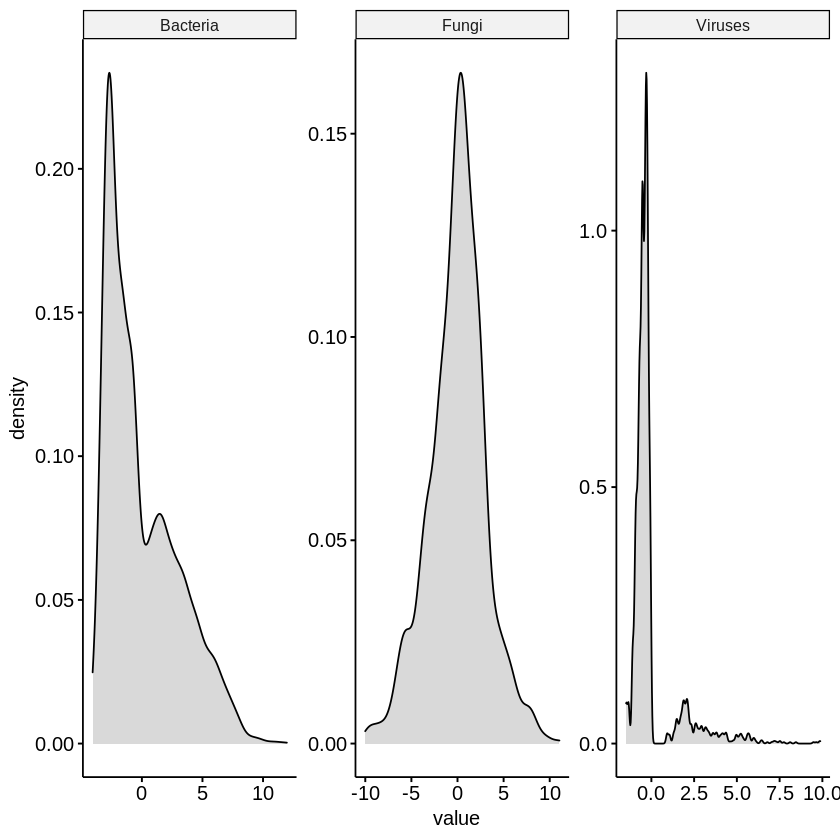

In [ ]:
ggdensity(dt, x='value', fill='gray70') +
  facet_wrap(~view, nrow=1, scales='free')

In [ ]:
colnames(metadata)

[1] "sample"          "Age"             "Sexs"            "Diagnosis"      
 [5] "Category"        "Penicillins"     "Cephalosporins"  "Carbapenems"    
 [9] "Macrolides"      "Aminoglycosides" "Quinolones"      "Co_trimoxazole" 
[13] "Metronidazole"   "Vancomycin"      "Acetate"         "Propionate"     
[17] "Butyrate"

In [ ]:
table(metadata$Category)


   Healthy, antibiotics Healthy, no antibiotics          Non septic ICU 
                      6                      20                       9 
                 Sepsis 
                     24 

In [ ]:
antibiotics <- c(
  "Penicillins", "Cephalosporins", "Carbapenems", "Macrolides", "Aminoglycosides", 
  "Quinolones", "Co_trimoxazole", "Metronidazole", "Vancomycin"
)
head(metadata[,head(antibiotics,n=4),with=F], n=3)

Penicillins Cephalosporins Carbapenems Macrolides
1 FALSE       FALSE          FALSE       FALSE     
2  TRUE       FALSE          FALSE       FALSE     
3 FALSE        TRUE          FALSE        TRUE

In [ ]:
metabolites <- c("Butyrate", "Acetate", "Propionate")
head(metadata[,metabolites,with=F], n=3)

Butyrate  Acetate   Propionate
1 0.2542837  6.442785 2.396135  
2 2.8831111 18.455667 3.592333  
3 2.4570000 10.499412 5.320059

In [ ]:
mofa <- create_mofa(dt)
mofa

Creating MOFA object from a data.frame...



Untrained MOFA model with the following characteristics: 
 Number of views: 3 
 Views names: Bacteria Fungi Viruses 
 Number of features (per view): 180 18 42 
 Number of groups: 1 
 Groups names: single_group 
 Number of samples (per group): 59 
 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


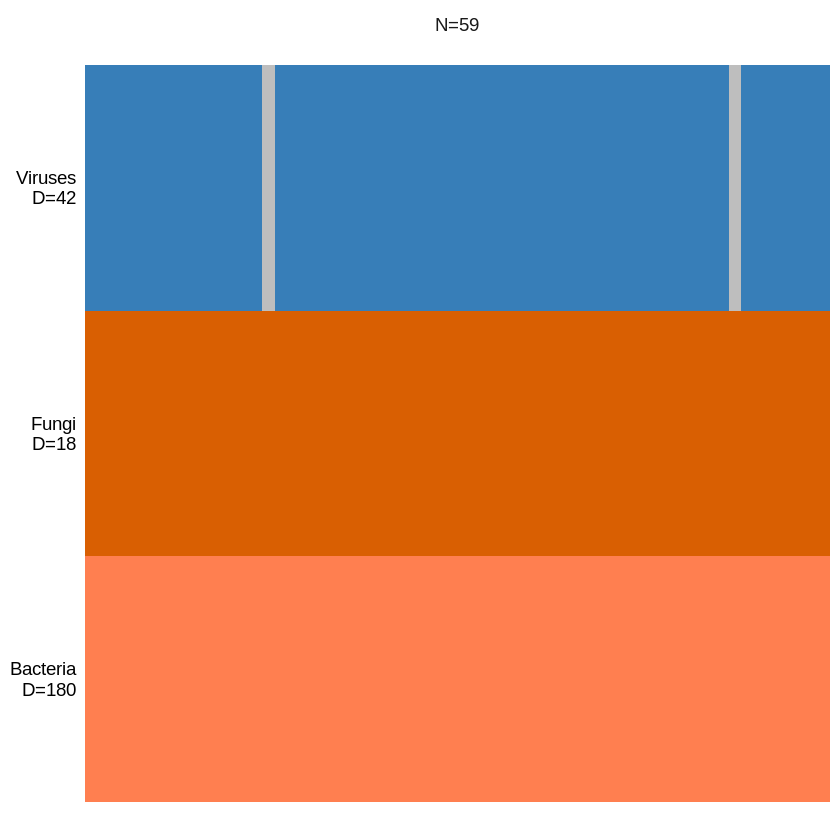

In [ ]:
plot_data_overview(mofa)

In [ ]:
model_opts <- get_default_model_options(mofa)
model_opts$num_factors <- 10

mofa <- prepare_mofa(mofa, model_options = model_opts)

Checking data options...

No data options specified, using default...

No training options specified, using default...

Checking model options...



In [ ]:
?prepare_mofa

In [ ]:
# Load pre-computed model
mofa <- readRDS(url("ftp://ftp.ebi.ac.uk/pub/databases/mofa/microbiome/model.rds"))

# Add sample metadata to the model
samples_metadata(mofa) <- metadata

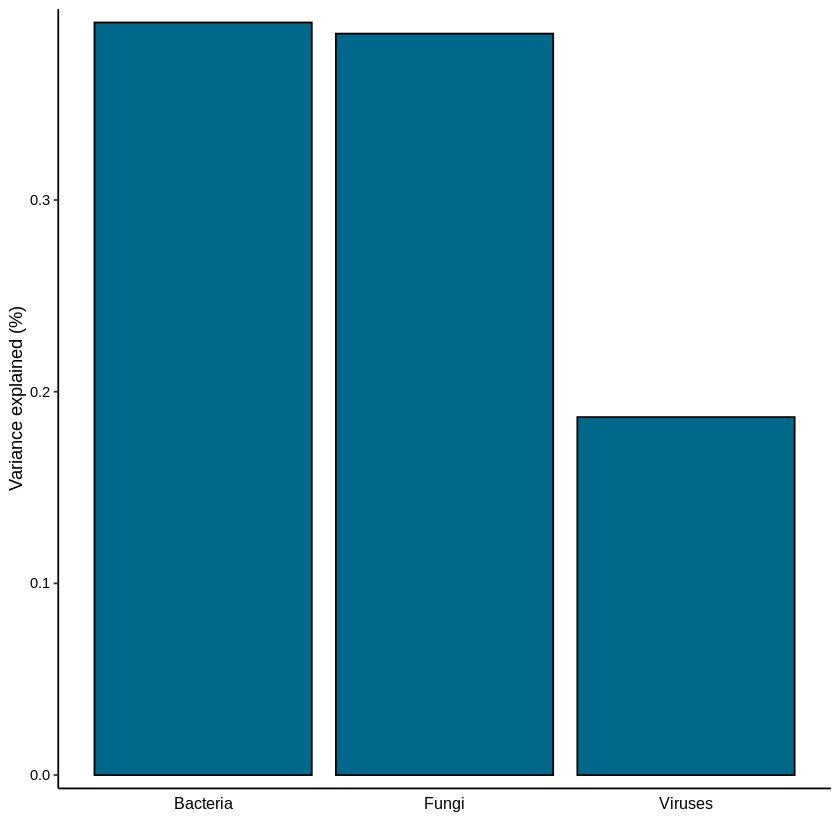

In [ ]:
plot_variance_explained(mofa, plot_total = T)[[2]]

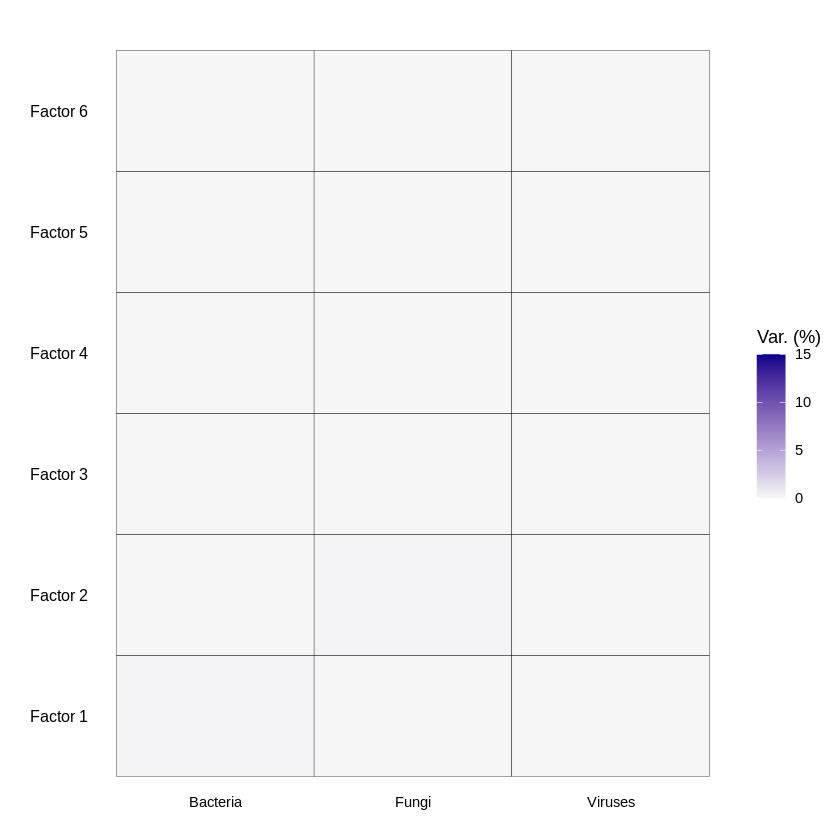

In [ ]:
plot_variance_explained(mofa, max_r2=15)

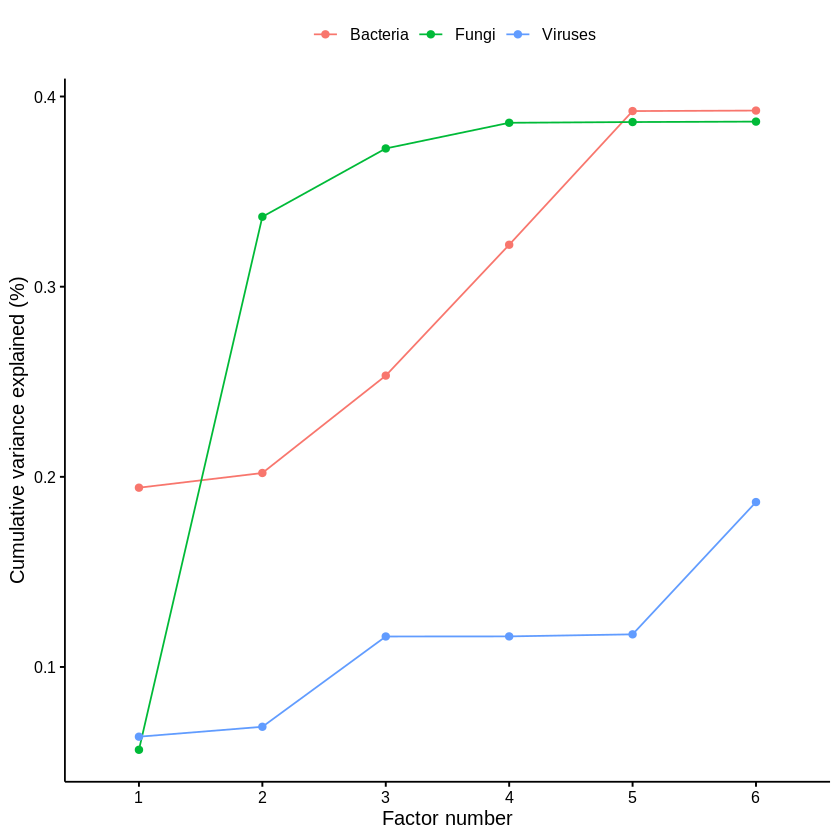

In [ ]:
r2 <- mofa@cache$variance_explained$r2_per_factor[[1]]

r2.dt <- r2 %>%
  as.data.table %>% .[, factor:=as.factor(1:mofa@dimensions$K)] %>%
  melt(id.vars=c('factor'), variable.name = 'view', value.name = 'r2') %>%
  .[, cum_r2:=cumsum(r2), by='view']

ggline(r2.dt, x='factor', y='cum_r2', color='view') +
  labs(x="Factor number", y="Cumulative variance explained (%)") +
  theme(
    legend.title = element_blank(), 
    legend.position = "top",
    axis.text = element_text(size=rel(0.8))
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


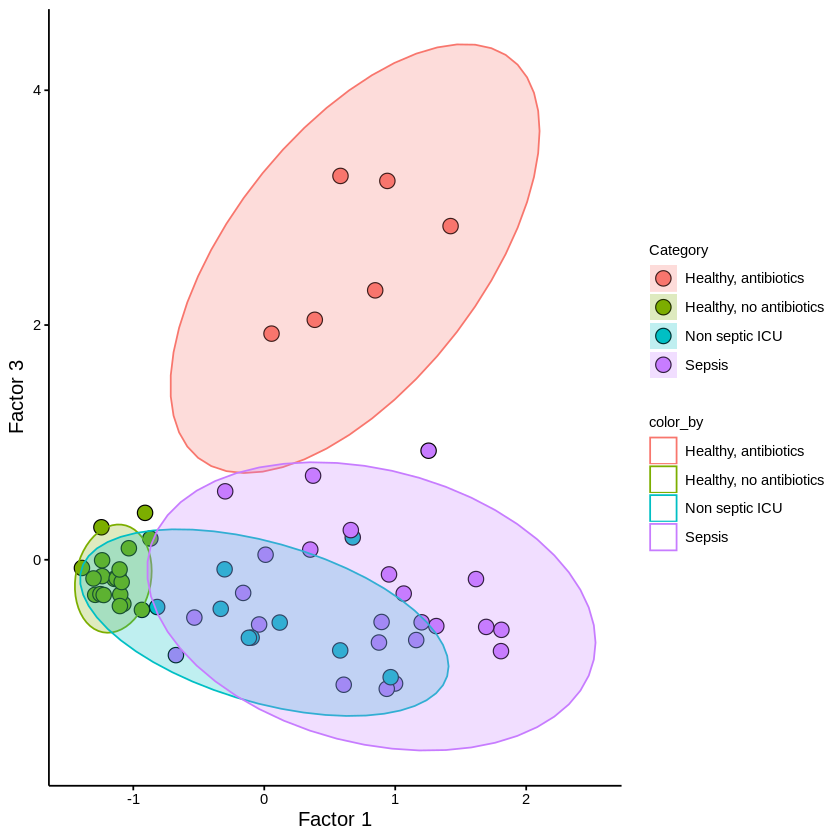

In [ ]:
p <- plot_factors(mofa, 
  factors = c(1,3), 
  color_by = "Category", 
  dot_size = 4) +
  stat_ellipse(aes(color=color_by), geom = "polygon", alpha=0.25)
p

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


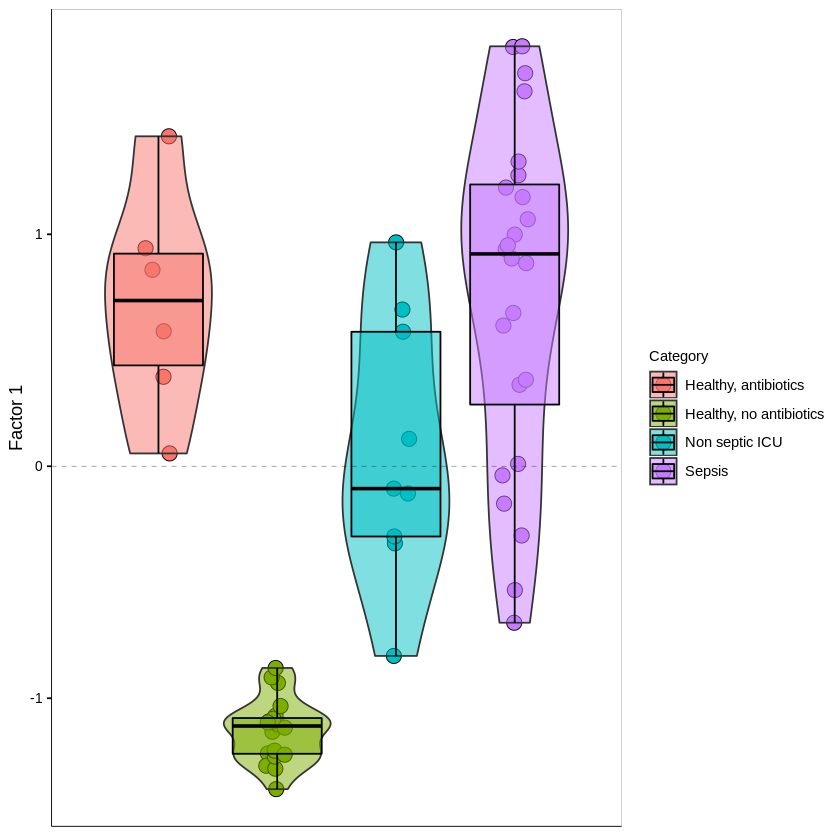

In [ ]:
plot_factor(mofa, 
  factor = 1, 
  color_by = "Category", 
  dot_size = 4,
  dodge = TRUE,
  stroke = 0.4,
  add_violin = T,
  add_boxplot = T
) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank()
  )

In [ ]:
plot_weights_fn <- function(mofa, factor=1, view=1, nfeatures=10) {
  p1 <- plot_weights(mofa, 
    factors = factor, 
    view = view,
    nfeatures = nfeatures,
    text_size = 4
  )
  
  p2 <- plot_top_weights(mofa, 
    factors = factor, 
    view = view,
    nfeatures = nfeatures
  )
  
  p <- cowplot::plot_grid(plotlist=list(p1,p2), nrow=1)
  return(p)
}


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


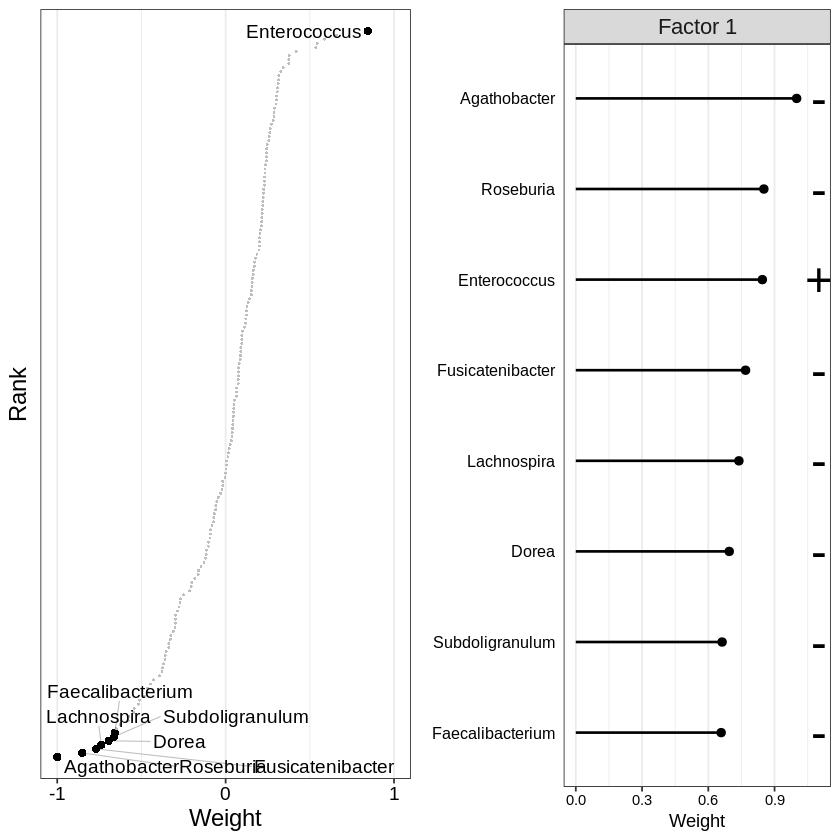

In [ ]:
plot_weights_fn(mofa, factor=1, view='Bacteria', nfeatures = 8)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


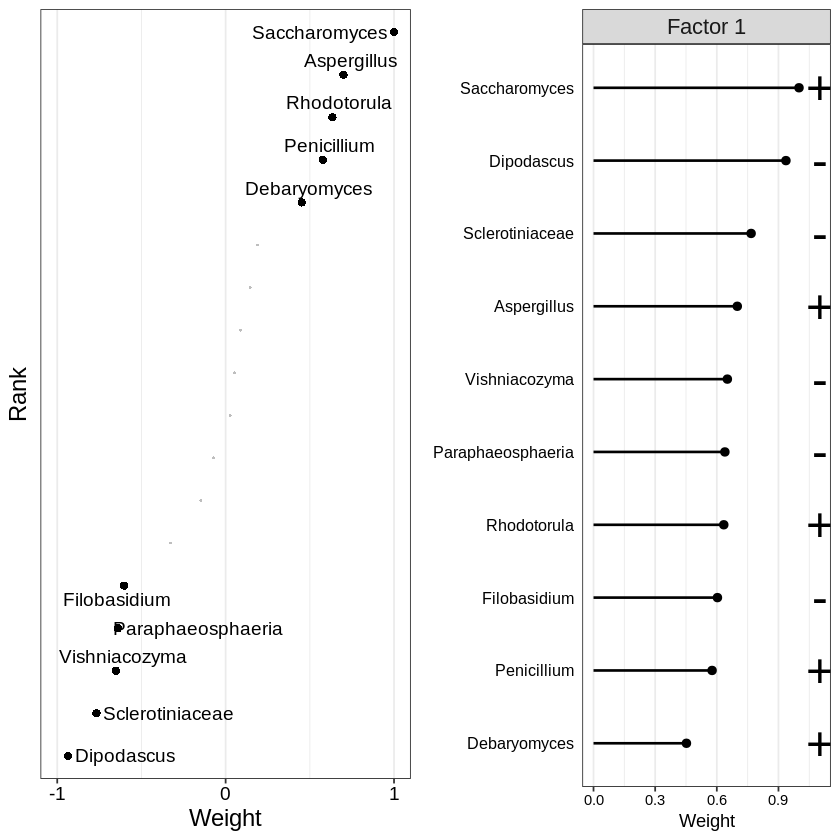

In [ ]:
plot_weights_fn(mofa, factor=1, view="Fungi", nfeatures=10)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


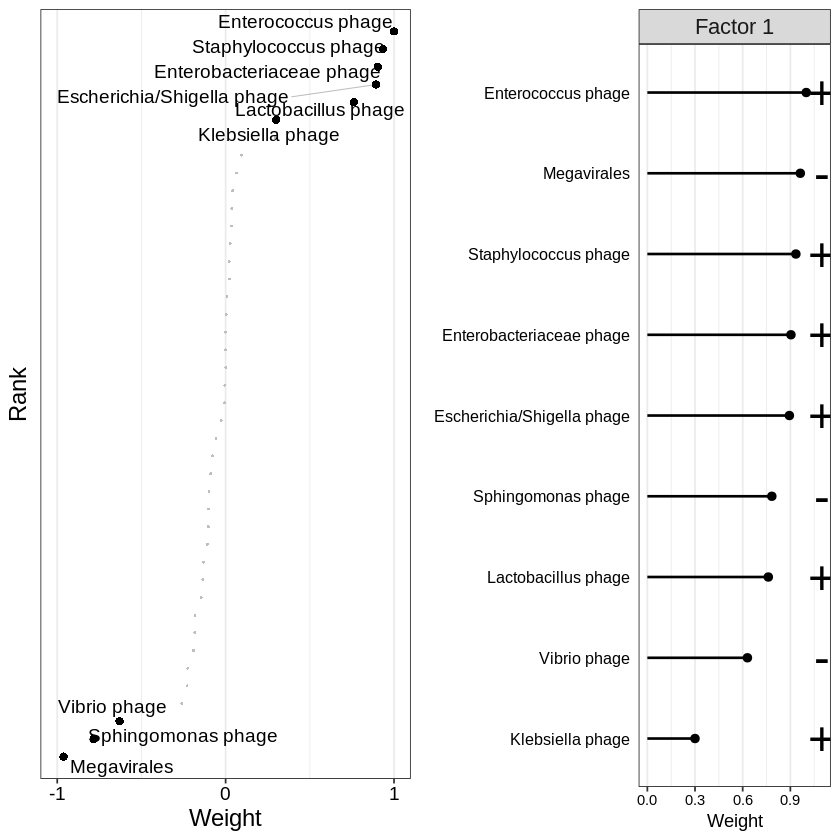

In [ ]:
plot_weights_fn(mofa, factor=1, view='Viruses', nfeatures = 9)

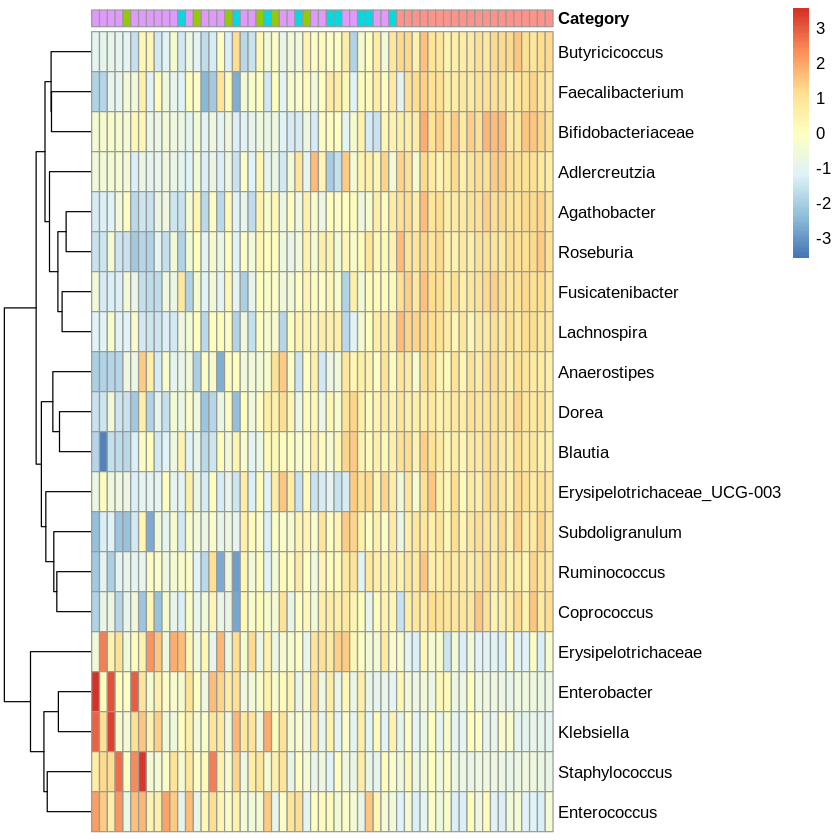

In [ ]:
plot_data_heatmap(mofa, 
  factor = 1, 
  view = "Bacteria", 
  features = 20,
  denoise = FALSE,
  cluster_rows = T, cluster_cols = F,
  show_colnames = F, show_rownames = T,
  annotation_samples = "Category",  
  annotation_legend = F,
  scale = "row"
)

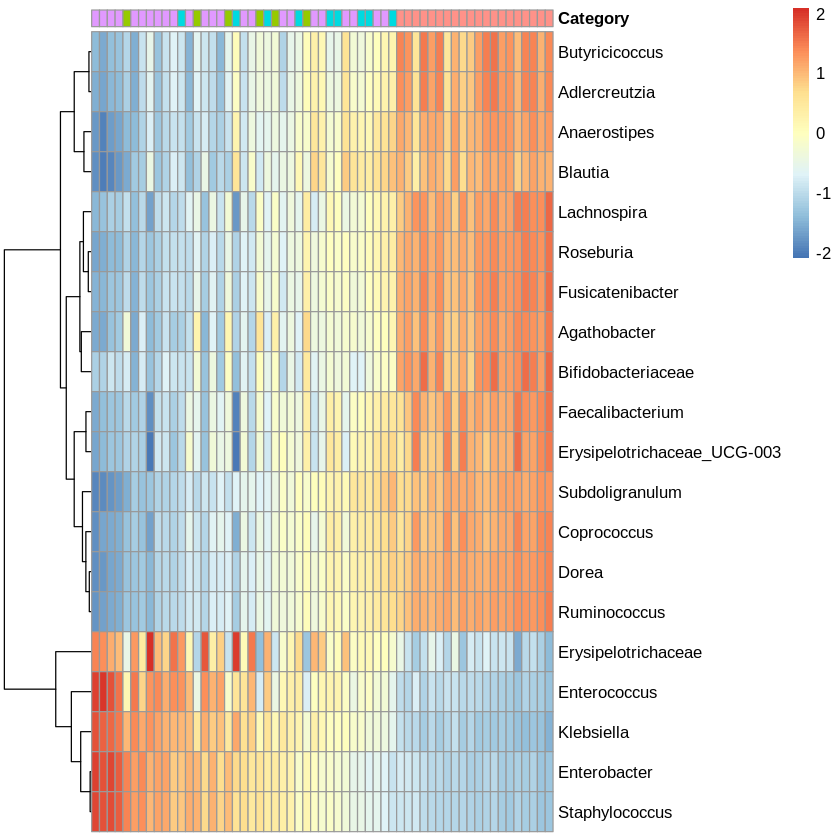

In [ ]:
plot_data_heatmap(mofa, 
  factor = 1, 
  view = "Bacteria", 
  features = 20,
  denoise = TRUE,
  cluster_rows = T, cluster_cols = F,
  show_colnames = F, show_rownames = T,
  annotation_samples = "Category",  
  annotation_legend = F,
  scale = "row"
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


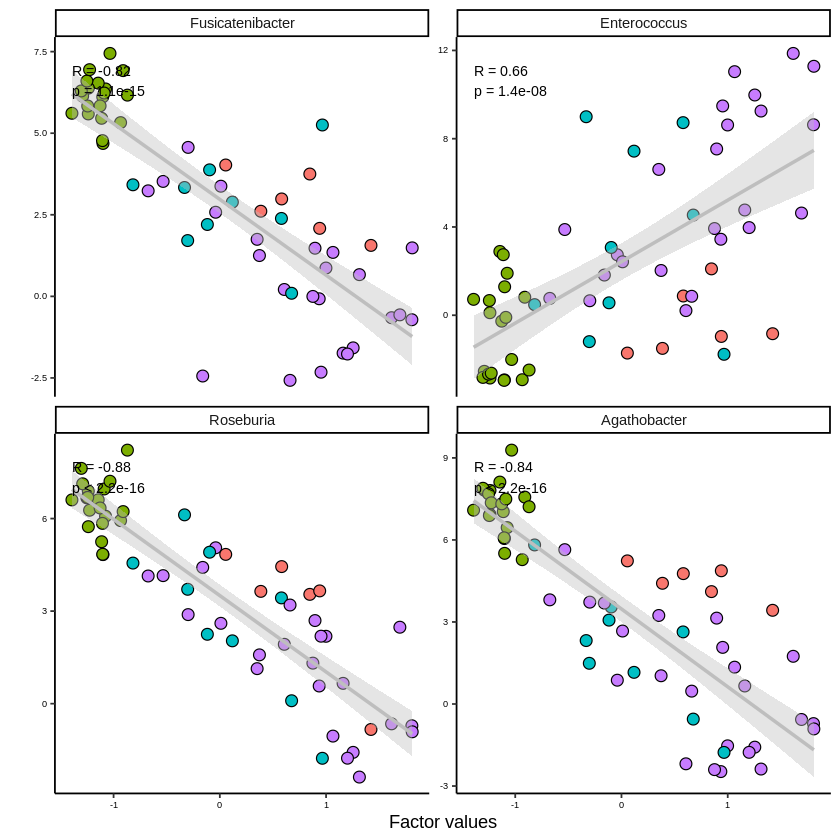

In [ ]:
plot_data_scatter(mofa, 
  factor = 1, 
  view = "Bacteria", 
  features = 4,
  dot_size = 3,
  color_by = "Category",
  legend = F
)

In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




Warning message in correlate_factors_with_covariates(mofa, covariates = antibiotics, :
“There are non-numeric values in the covariates data.frame, converting to numeric...”


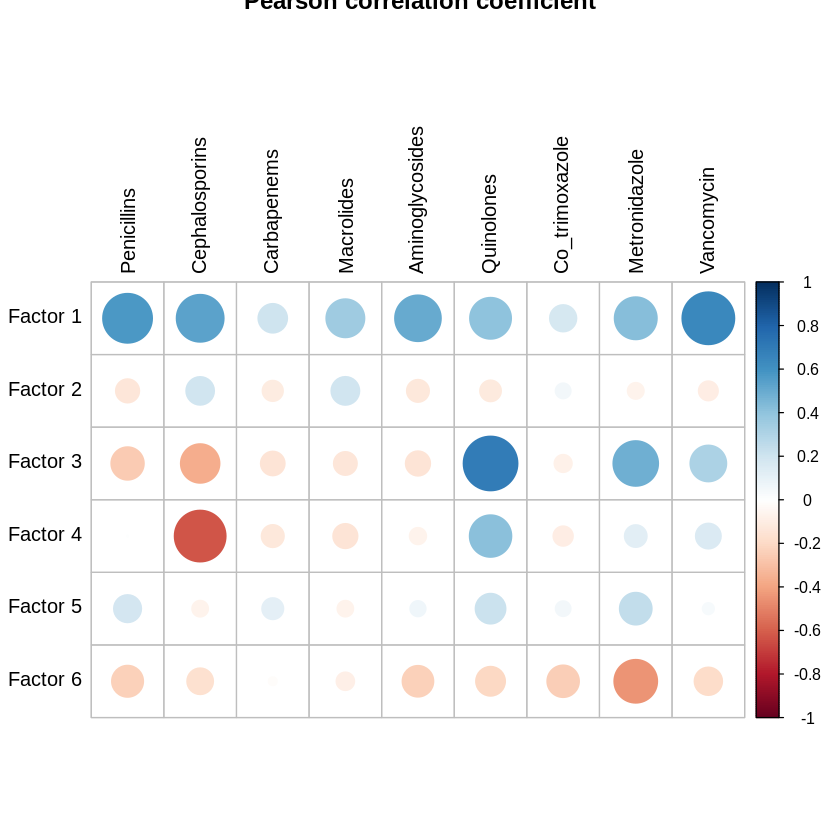

In [ ]:
correlate_factors_with_covariates(mofa,
  covariates = antibiotics,
  plot = 'r',)

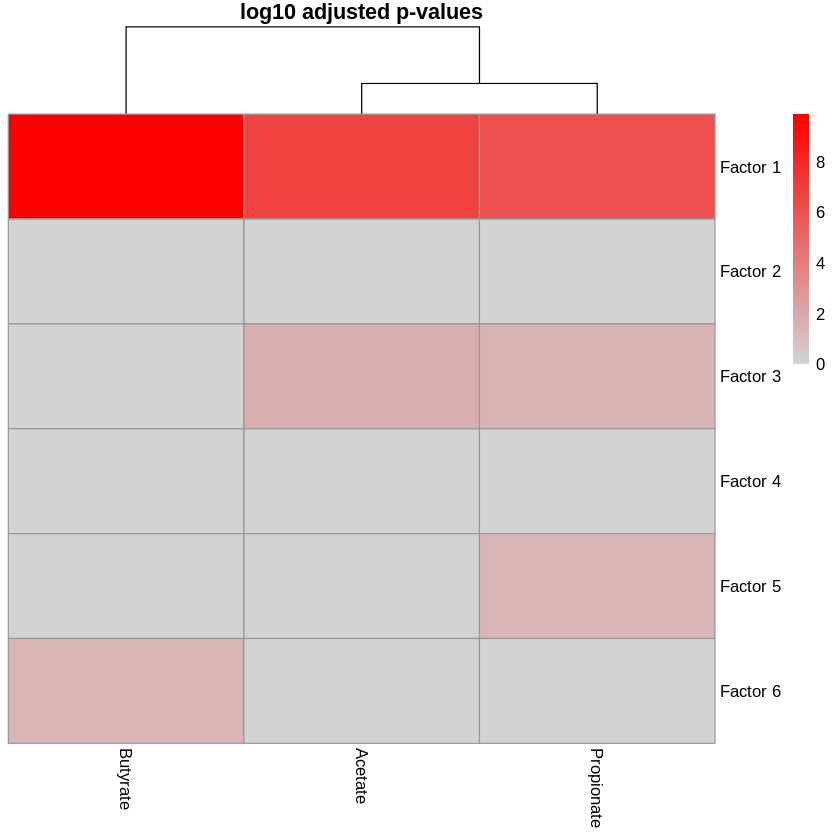

In [ ]:
correlate_factors_with_covariates(mofa, 
  covariates = metabolites,
  plot = "log_pval",
)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



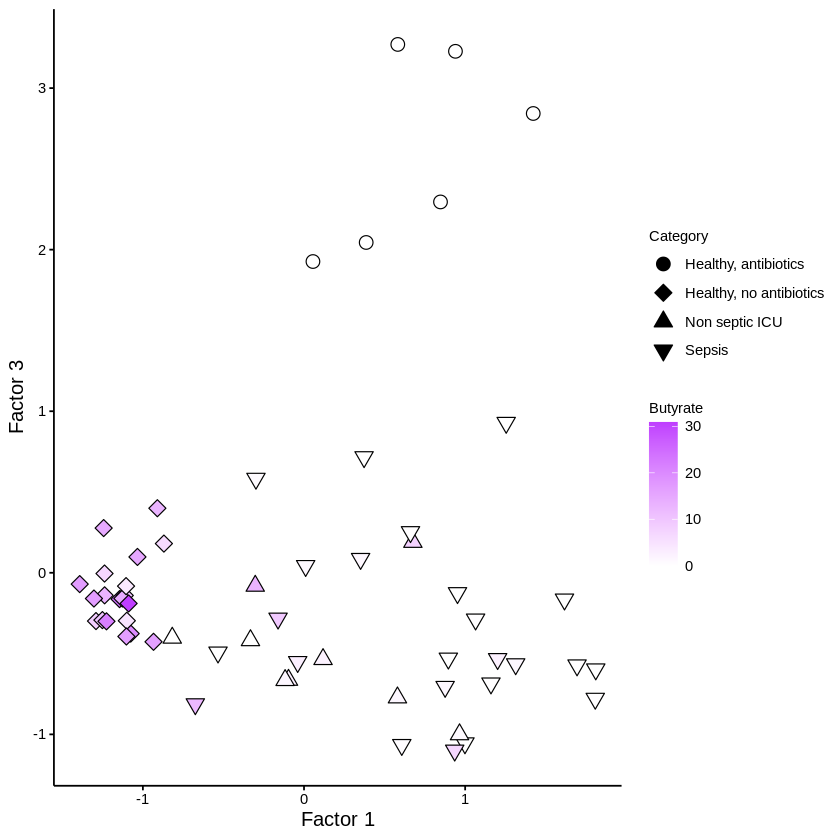

In [ ]:
plot_factors(mofa, 
  factors = c(1,3), 
  color_by = "Butyrate", 
  shape_by = "Category", 
  dot_size = 3.5
) + scale_fill_gradient(low = "white", high = "#BF3EFF")

## Applying MOFA+ to the Chronic Lymphocytic Leukemia cohort

In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("BloodCancerMultiOmics2017")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'BloodCancerMultiOmics2017'

also installing the dependencies ‘bit’, ‘formatR’, ‘bit64’, ‘plogr’, ‘Biostrings’, ‘zlibbioc’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘bitops’, ‘XVector’, ‘futile.logger’, ‘snow’, ‘AnnotationDbi’, ‘annotate’, ‘iterators’, ‘RCurl’, ‘GenomeInfoDbData’, ‘GenomicRanges’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’, ‘foreach’, ‘shape’, ‘GenomeInfoDb’, ‘beeswarm’, ‘Biobase’, ‘DESeq2’, ‘ggdendro’, ‘glmnet’, ‘ipflasso’, ‘SummarizedExperiment’


Old packages: 'cli', 'gargle', 'googledrive', 'openssl', 'Rcpp', 'testthat'



In [4]:
BiocManager::install("MOFAdata")


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Installing package(s) 'MOFAdata'

Old packages: 'cli', 'gargle', 'googledrive', 'openssl', 'Rcpp', 'testthat'



In [5]:
library(MOFA2)
library(MOFAdata)
library(data.table)
library(ggplot2)
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [6]:
utils::data("CLL_data")       
lapply(CLL_data,dim)

$Drugs
[1] 310 200

$Methylation
[1] 4248  200

$mRNA
[1] 5000  200

$Mutations
[1]  69 200

In [9]:
CLL_metadata <- fread("ftp://ftp.ebi.ac.uk/pub/databases/mofa/cll_vignette/sample_metadata.txt")


In [10]:
CLL_metadata %>% head()

sample Gender age      TTT        TTD      treatedAfter died  IGHV trisomy12
1 H005   m      75.26575 0.57494867 2.625599  TRUE        FALSE  1    0       
2 H006   m            NA         NA       NA    NA           NA NA   NA       
3 H007   f            NA         NA       NA    NA           NA NA   NA       
4 H008   m            NA         NA       NA    NA           NA NA   NA       
5 H010   f      72.78082 2.93223819 2.932238 FALSE        FALSE  0    0       
6 H011   f      72.99452 0.01916496 2.951403  TRUE        FALSE  1    0

In [11]:
MOFAobject <- create_mofa(CLL_data)

Creating MOFA object from a list of matrices (features as rows, sample as columns)...




In [12]:
MOFAobject

Untrained MOFA model with the following characteristics: 
 Number of views: 4 
 Views names: Drugs Methylation mRNA Mutations 
 Number of features (per view): 310 4248 5000 69 
 Number of groups: 1 
 Groups names: group1 
 Number of samples (per group): 200 
 

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


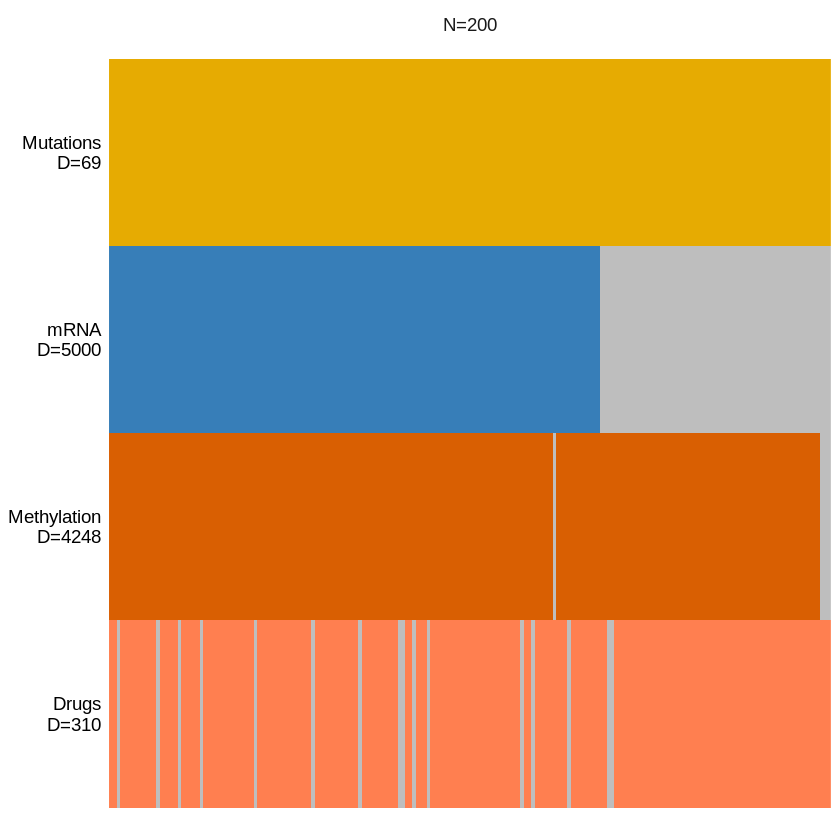

In [13]:
plot_data_overview(MOFAobject)

In [15]:
data_opts <- get_default_data_options(MOFAobject)
data_opts

$scale_views
[1] FALSE

$scale_groups
[1] FALSE

$center_groups
[1] TRUE

$use_float32
[1] FALSE

$views
[1] "Drugs"       "Methylation" "mRNA"        "Mutations"  

$groups
[1] "group1"

In [16]:
model_opts <- get_default_model_options(MOFAobject)
model_opts$num_factors <- 15

model_opts

$likelihoods
      Drugs Methylation        mRNA   Mutations 
 "gaussian"  "gaussian"  "gaussian"  "gaussian" 

$num_factors
[1] 15

$spikeslab_factors
[1] FALSE

$spikeslab_weights
[1] TRUE

$ard_factors
[1] FALSE

$ard_weights
[1] TRUE

In [17]:
train_opts <- get_default_training_options(MOFAobject)
train_opts$convergence_mode <- 'slow'
train_opts$seed <- 42

train_opts

$maxiter
[1] 1000

$convergence_mode
[1] "slow"

$drop_factor_threshold
[1] -1

$verbose
[1] FALSE

$startELBO
[1] 1

$freqELBO
[1] 5

$stochastic
[1] FALSE

$gpu_mode
[1] FALSE

$seed
[1] 42

$outfile
NULL

$weight_views
[1] FALSE

$save_interrupted
[1] FALSE

In [18]:
MOFAobject <- prepare_mofa(MOFAobject,
  data_options = data_opts,
  model_options = model_opts,
  training_options = train_opts)

# MOFAobject <- run_mofa(MOFAobject, outfile='MOFA2_CLL.hdf5')
# saveRDS(MOFAobject, 'MOFA2_CLL.rds')

Checking data options...

Checking training options...

Checking model options...



In [19]:
MOFAobject <- readRDS(url("http://ftp.ebi.ac.uk/pub/databases/mofa/cll_vignette/MOFA2_CLL.rds"))

In [20]:
slotNames(MOFAobject)

[1] "data"               "covariates"         "covariates_warped" 
 [4] "intercepts"         "imputed_data"       "interpolated_Z"    
 [7] "samples_metadata"   "features_metadata"  "expectations"      
[10] "training_stats"     "data_options"       "model_options"     
[13] "training_options"   "stochastic_options" "mefisto_options"   
[16] "dimensions"         "on_disk"            "dim_red"           
[19] "cache"              "status"

In [21]:
names(MOFAobject@data)

[1] "Drugs"       "Methylation" "mRNA"        "Mutations"

In [22]:
dim(MOFAobject@data$Drugs$group1)

[1] 310 200

In [23]:
names(MOFAobject@expectations)

[1] "Z" "W"

In [24]:
dim(MOFAobject@expectations$Z$group1)

[1] 200  15

In [25]:
dim(MOFAobject@expectations$W$mRNA)

[1] 5000   15

In [26]:
stopifnot(all(sort(CLL_metadata$sample)==sort(unlist(samples_names(MOFAobject)))))

In [27]:
samples_metadata(MOFAobject) <- CLL_metadata

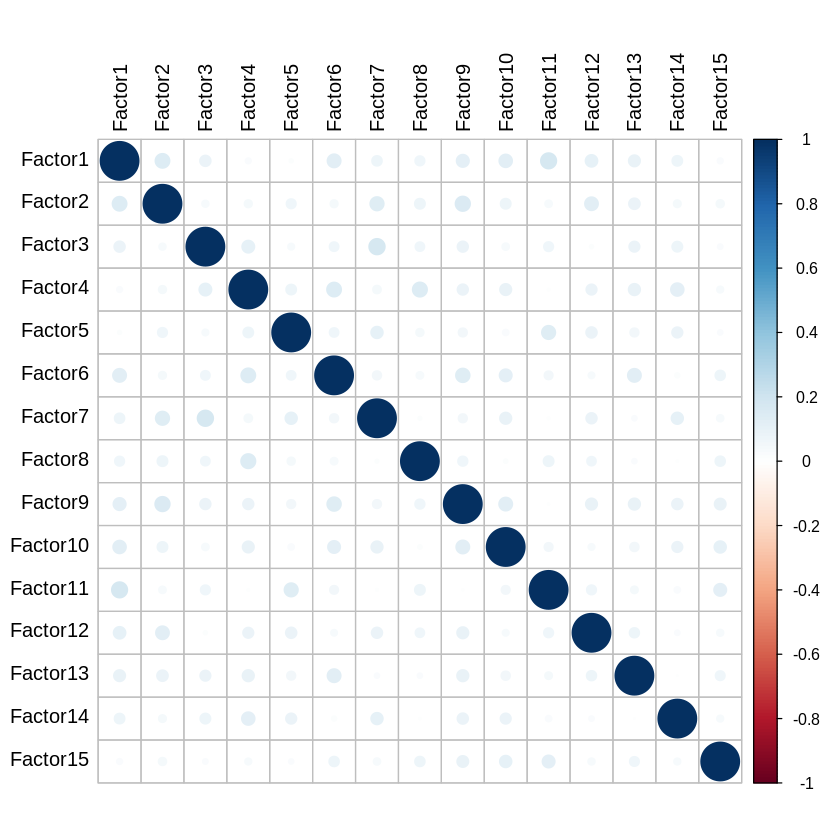

In [28]:
plot_factor_cor(MOFAobject)

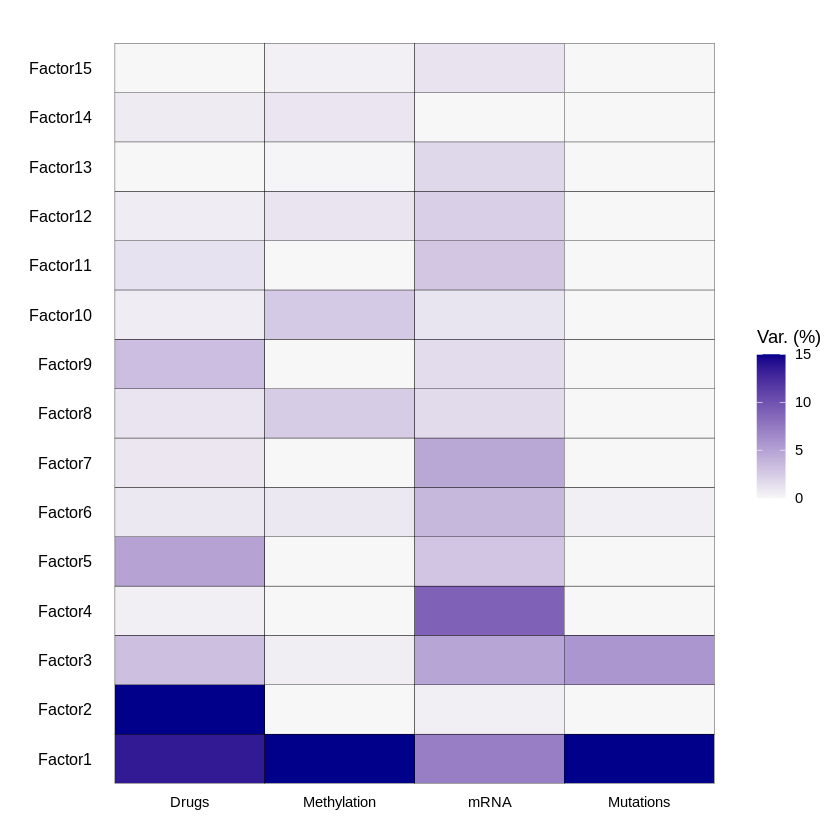

In [29]:
plot_variance_explained(MOFAobject, max_r2 = 15)

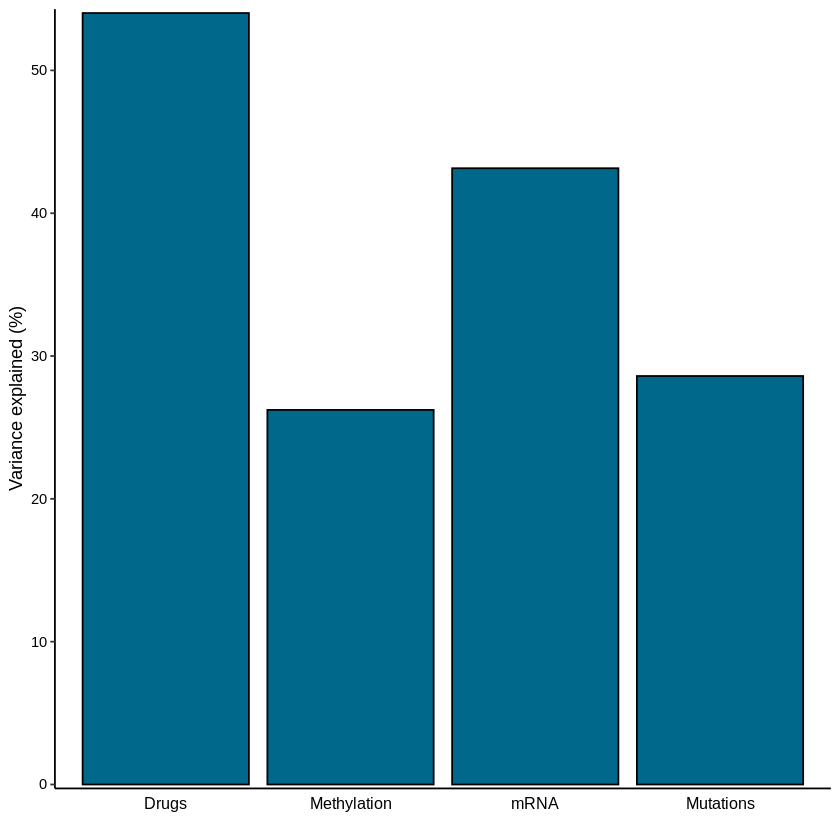

In [30]:
plot_variance_explained(MOFAobject, plot_total = T)[[2]]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’


Warning message in correlate_factors_with_covariates(MOFAobject, covariates = c("Gender", :
“There are non-numeric values in the covariates data.frame, converting to numeric...”


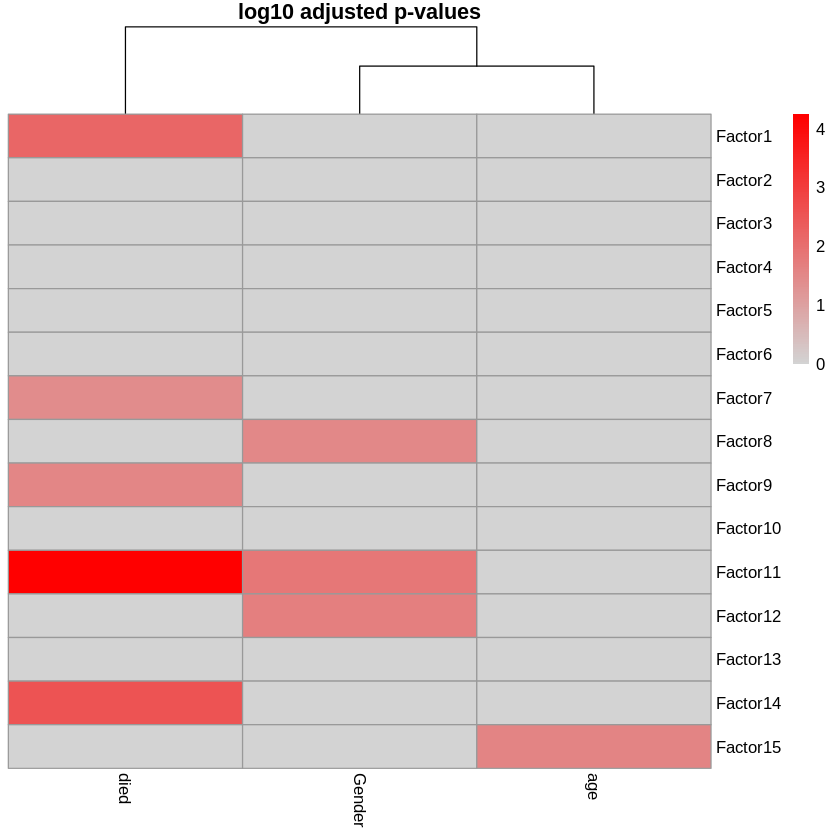

In [32]:
install.packages("psych")

correlate_factors_with_covariates(MOFAobject,
  covariates = c('Gender', 'died', 'age'),
  plot = 'log_pval')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


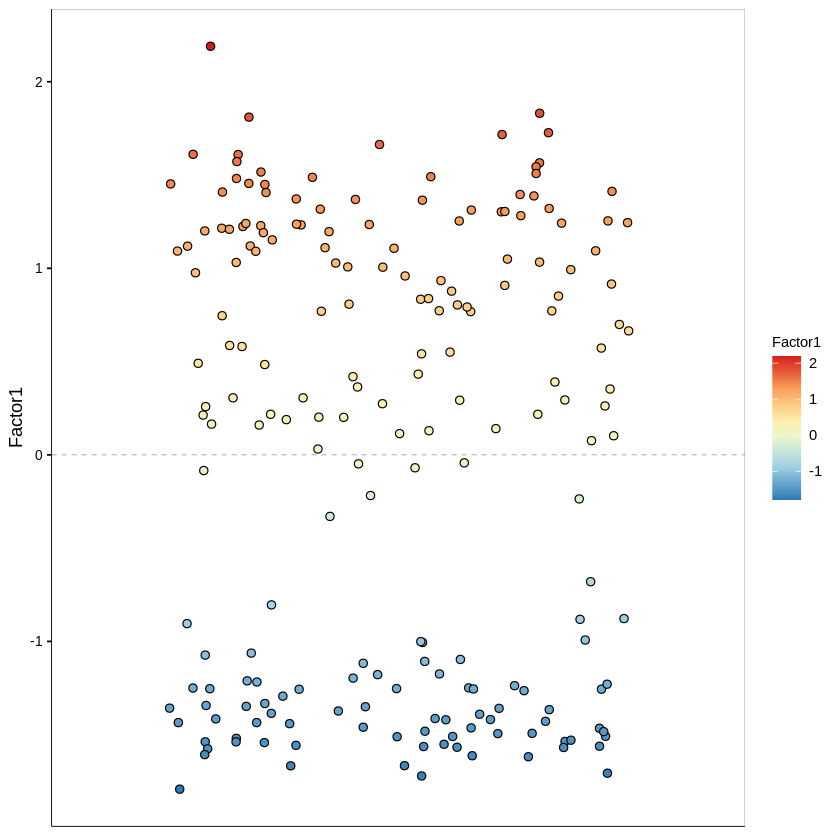

In [33]:
plot_factor(MOFAobject,
  factors = 1,
  color_by = 'Factor1')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


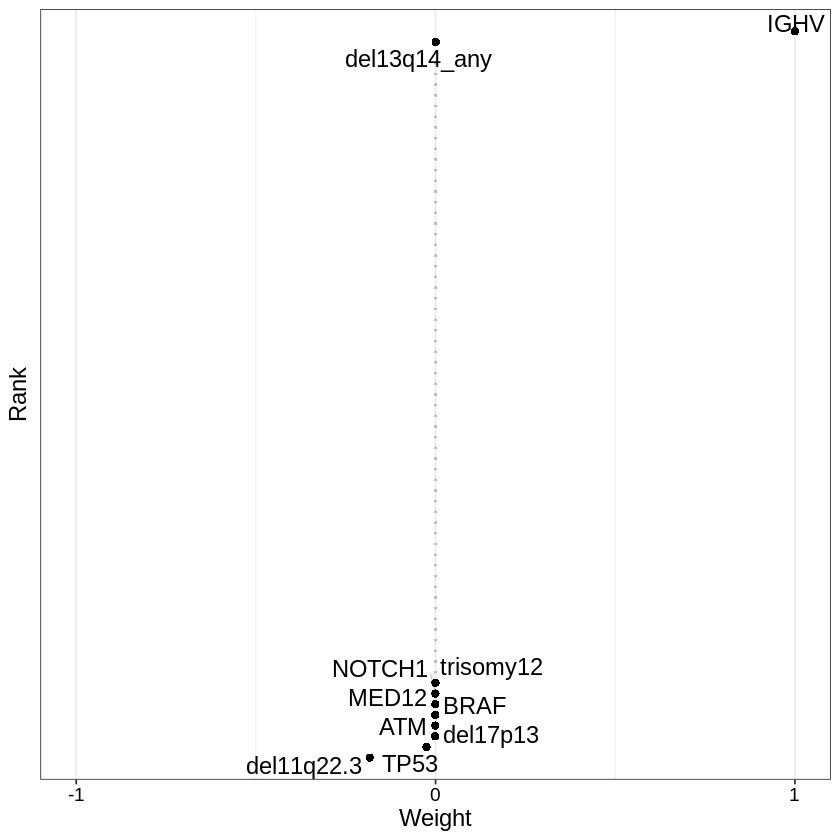

In [34]:
plot_weights(MOFAobject,
  view = 'Mutations',
  factor = 1,
  nfeatures = 10,
  scale = T)

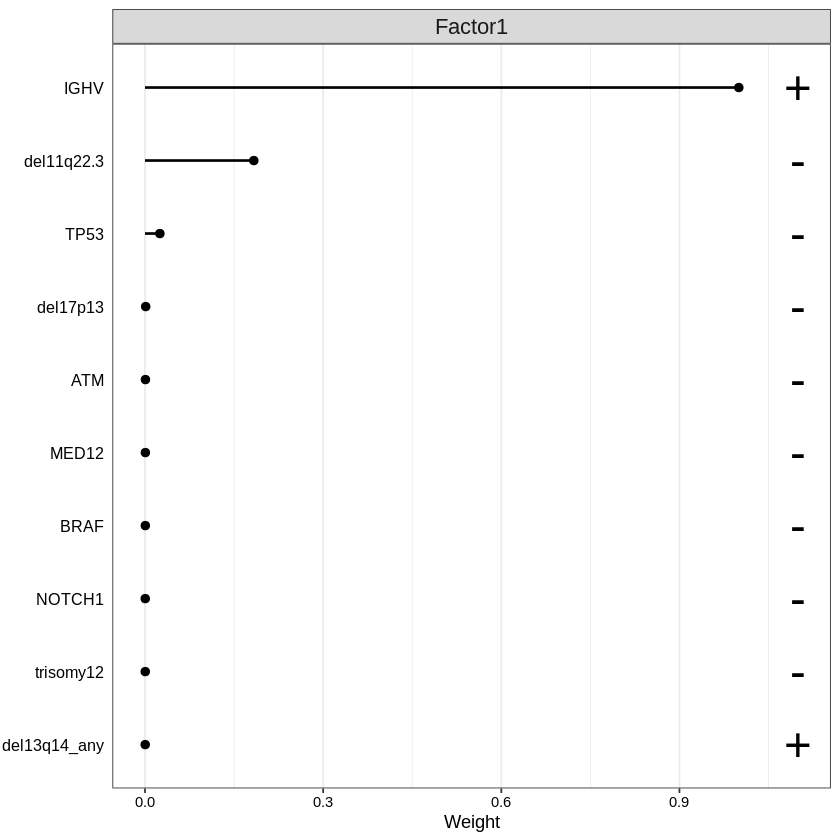

In [35]:
plot_top_weights(MOFAobject,
  view = 'Mutations',
  factor = 1,
  nfeatures = 10,
  scale = T)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


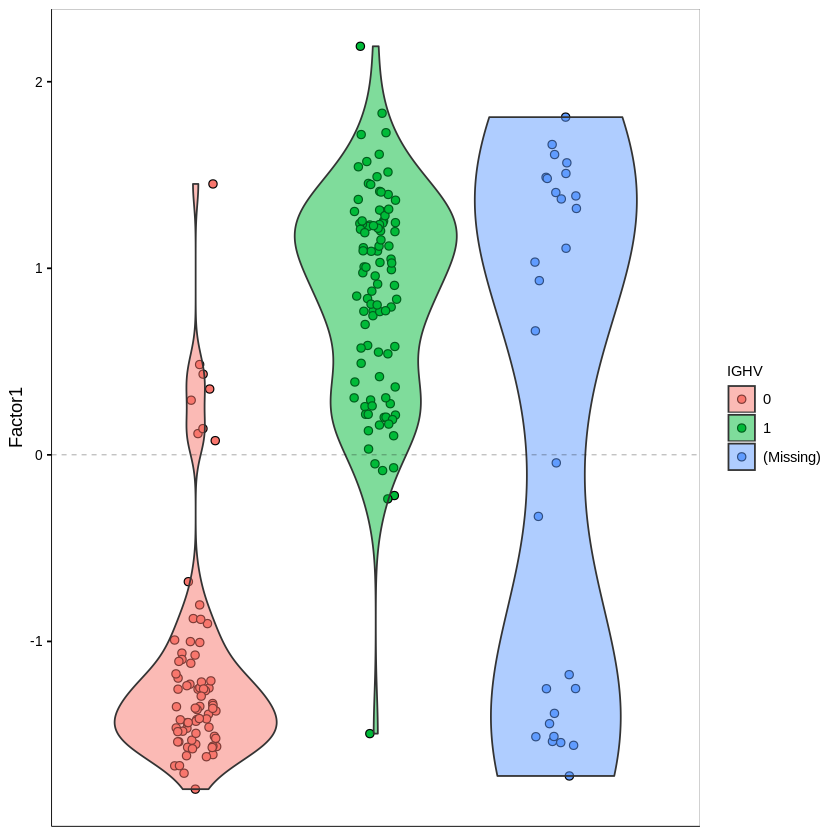

In [37]:
plot_factor(MOFAobject,
  factors = 1,
  color_by = 'IGHV',
  add_violin = TRUE,
  dodge = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


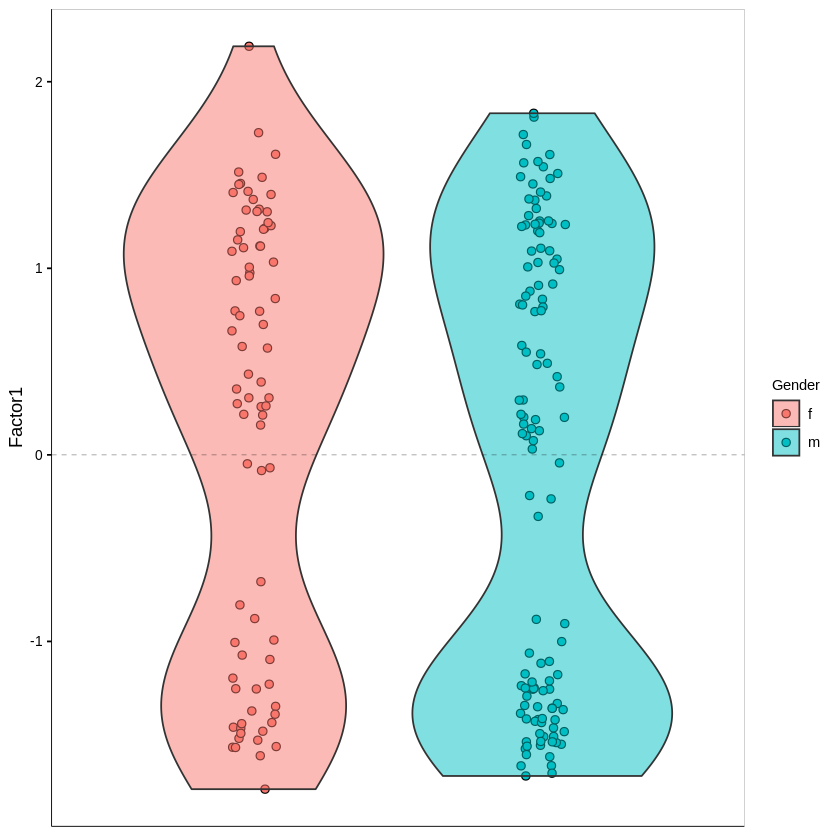

In [38]:
plot_factor(MOFAobject, 
  factors = 1, 
  color_by = "Gender",
  dodge = TRUE,
  add_violin = TRUE
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


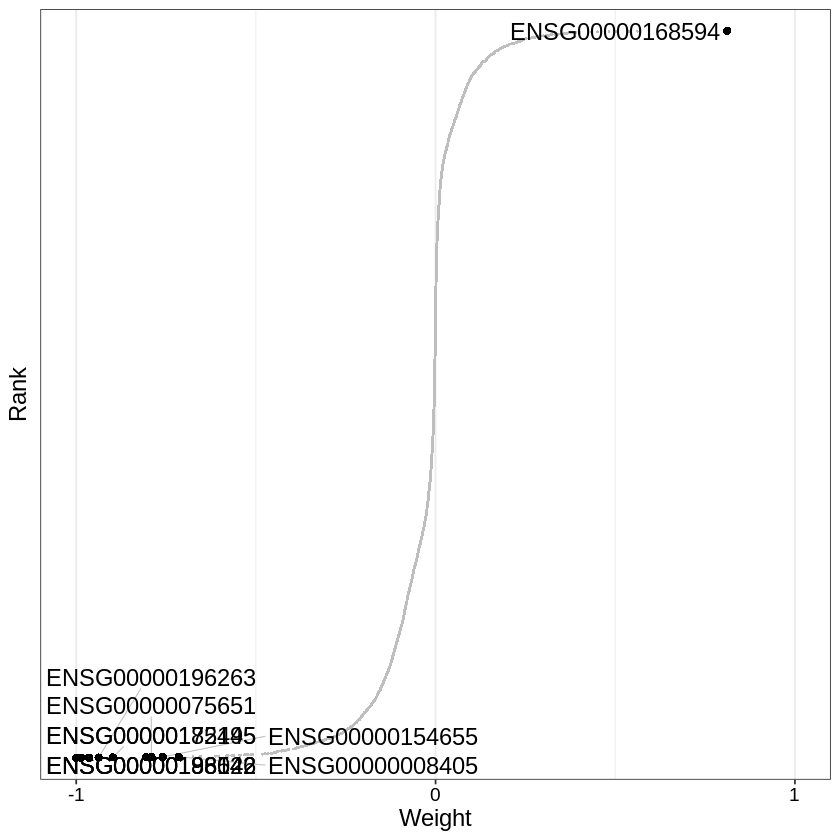

In [39]:
plot_weights(MOFAobject,
  view = 'mRNA',
  factor = 1,
  nfeatures = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


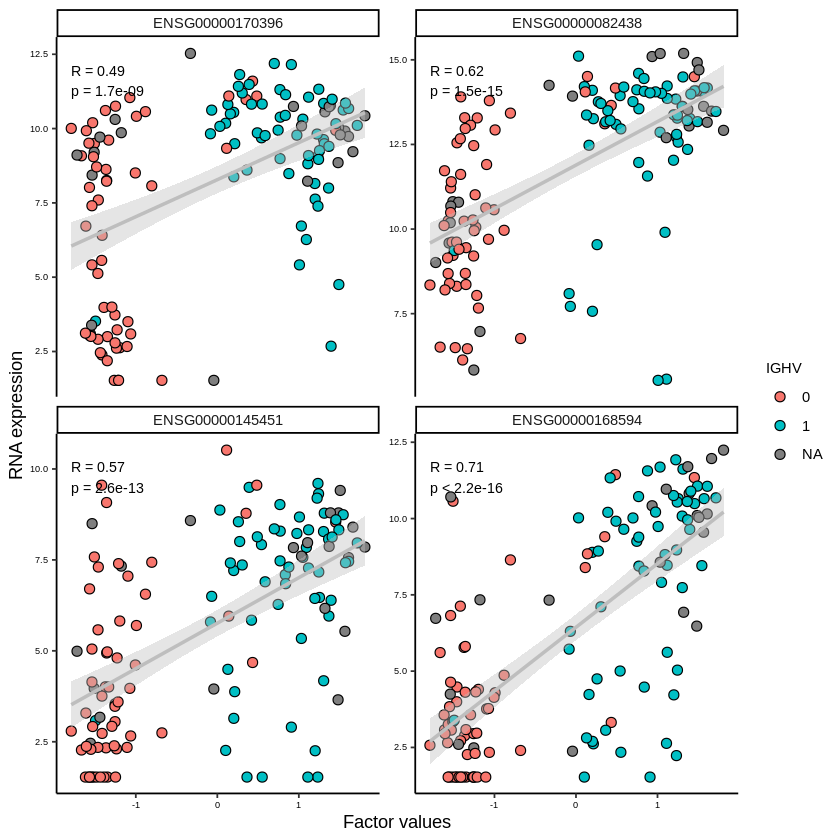

In [41]:
install.packages('ggpubr')
plot_data_scatter(MOFAobject,
  view = 'mRNA',
  factor = 1,
  features = 4,
  sign = 'positive',
  color_by = 'IGHV') +
  labs(y='RNA expression')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


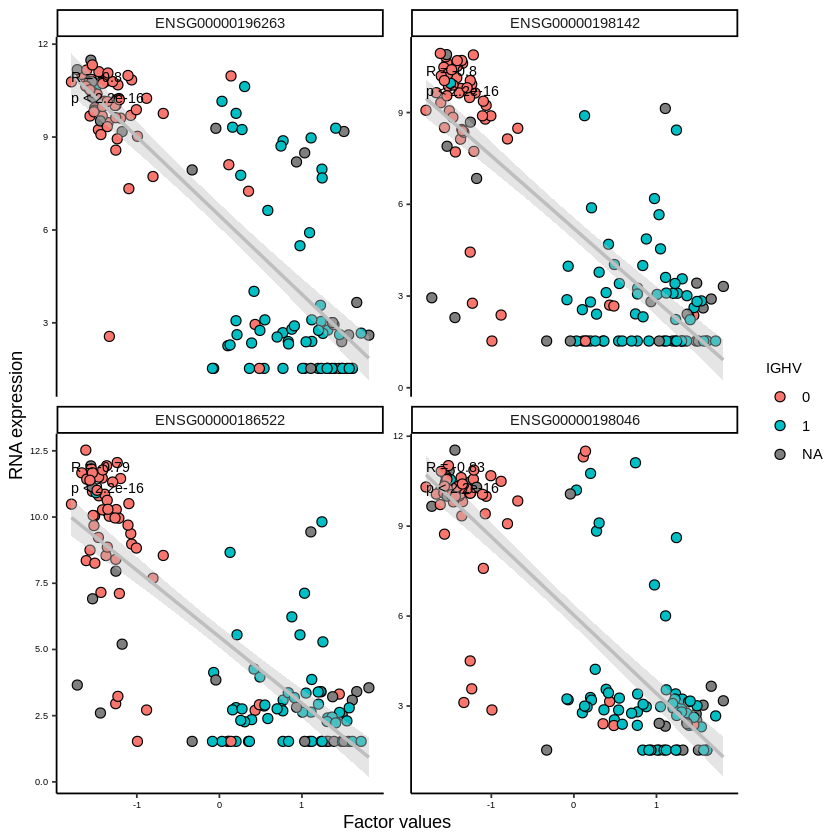

In [42]:
plot_data_scatter(MOFAobject,
  view = 'mRNA',
  factor = 1,
  features = 4,
  sign = 'negative',
  color_by = 'IGHV') +
  labs(y = 'RNA expression')

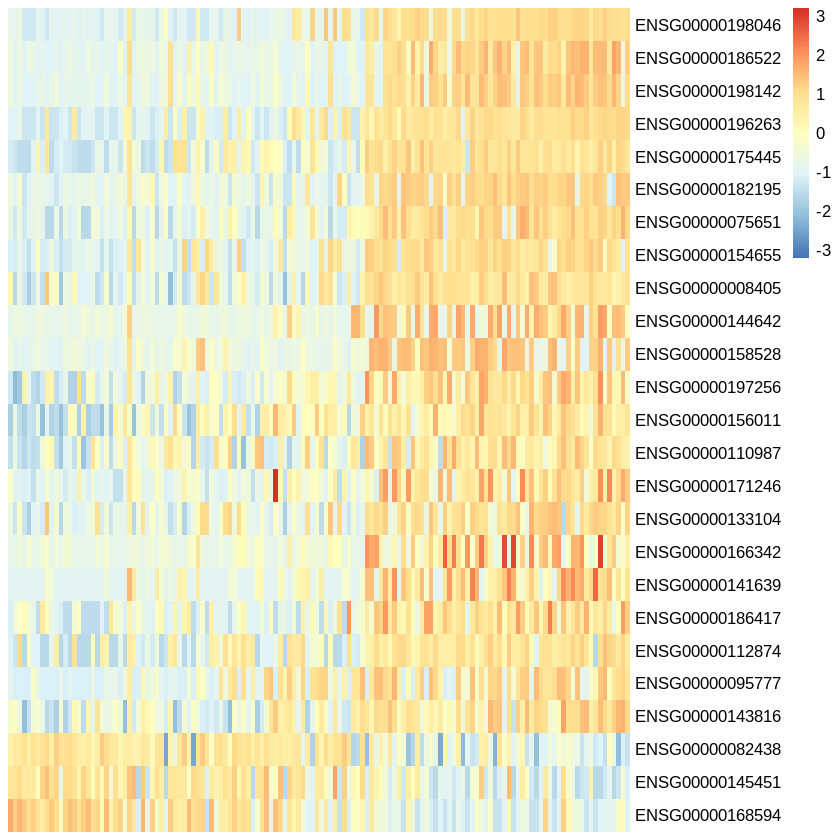

In [44]:
plot_data_heatmap(MOFAobject,
  view = 'mRNA',
  factor = 1,
  features = 25,
  cluster_rows = FALSE, cluster_cols = FALSE,
  show_rownames = TRUE, show_colnames = FALSE,
  scale = 'row')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


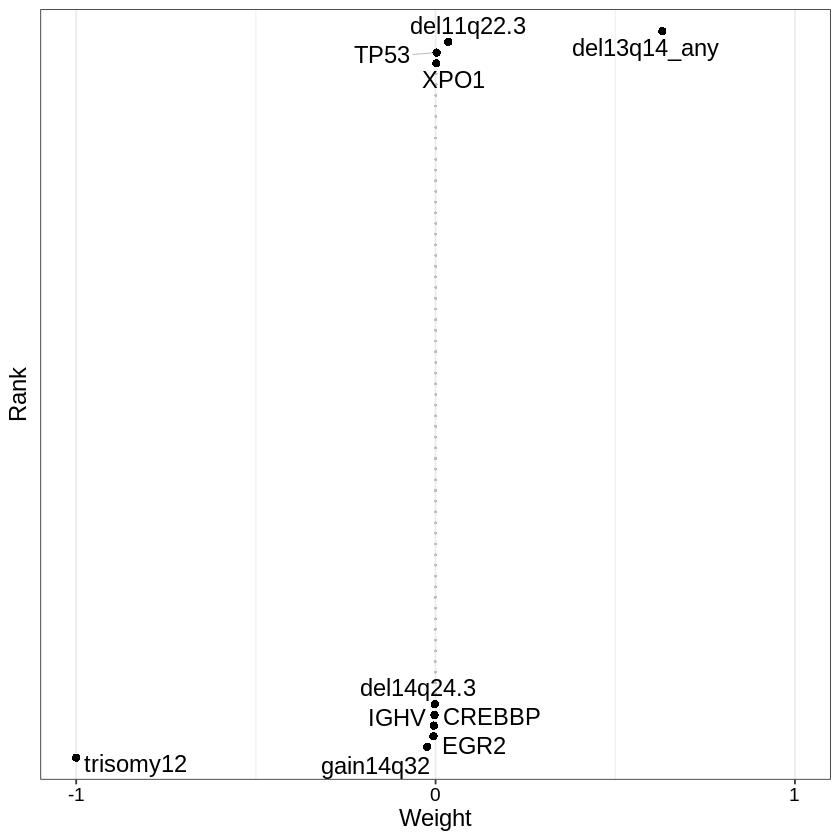

In [45]:
plot_weights(MOFAobject,
  view = 'Mutations',
  factor = 3,
  nfeatures = 10,
  abs = F)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


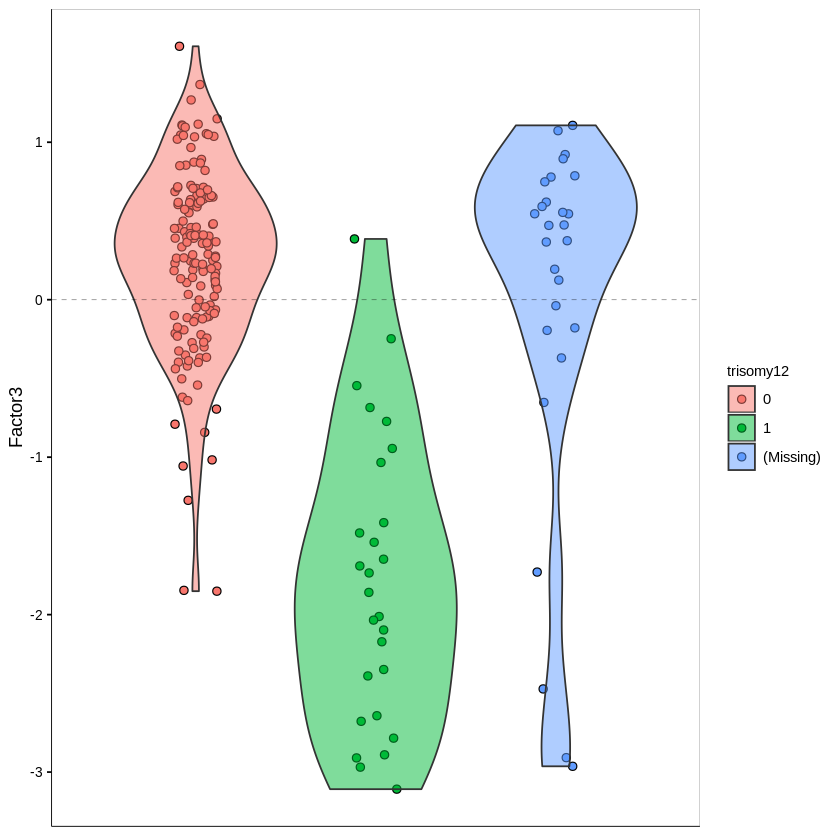

In [46]:
plot_factor(MOFAobject,
  factors = 3,
  color_by = 'trisomy12',
  dodge = TRUE,
  add_violin = TRUE)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


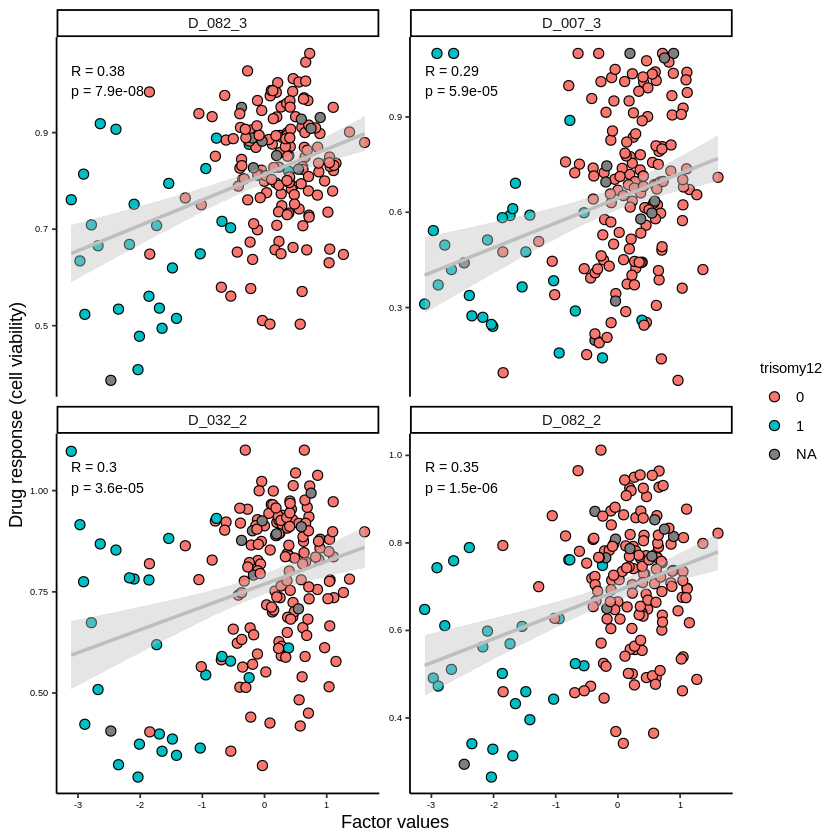

In [47]:
plot_data_scatter(MOFAobject,
  view = 'Drugs',
  factor = 3,
  features = 4,
  sign = 'positive',
  color_by = 'trisomy12'
) + labs(y = 'Drug response (cell viability)')

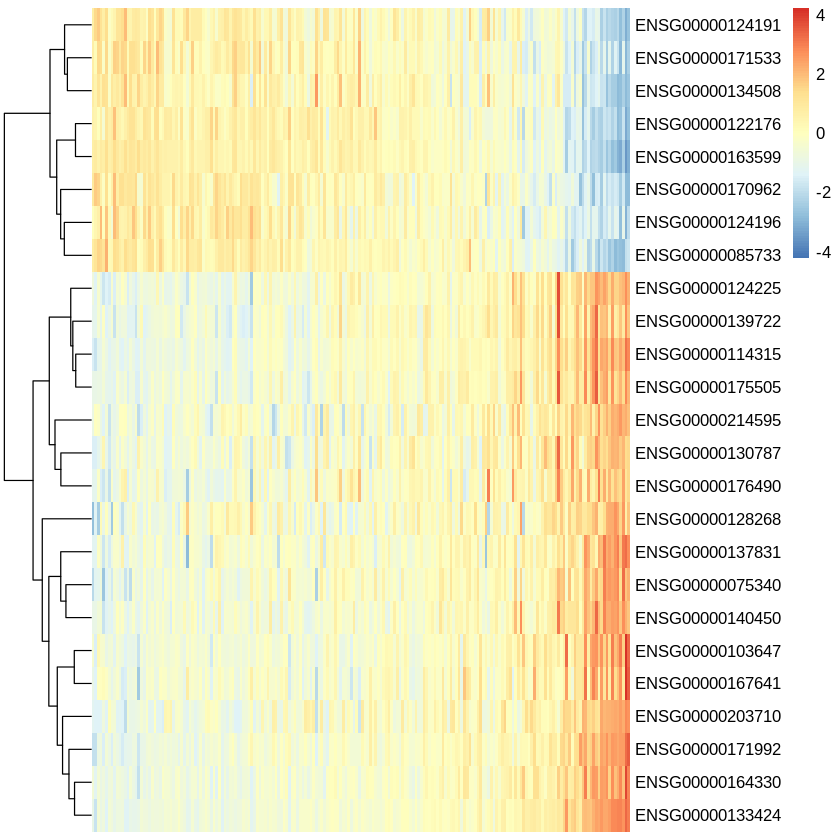

In [48]:
plot_data_heatmap(MOFAobject,
  view = 'mRNA',
  factor = 3,
  features = 25,
  denoise = TRUE,
  cluster_rows = TRUE, cluster_cols = FALSE,
  show_rownames = TRUE, show_colnames = FALSE,
  scale = 'row')

Warning message:
“Removed 27 rows containing missing values (geom_point).”


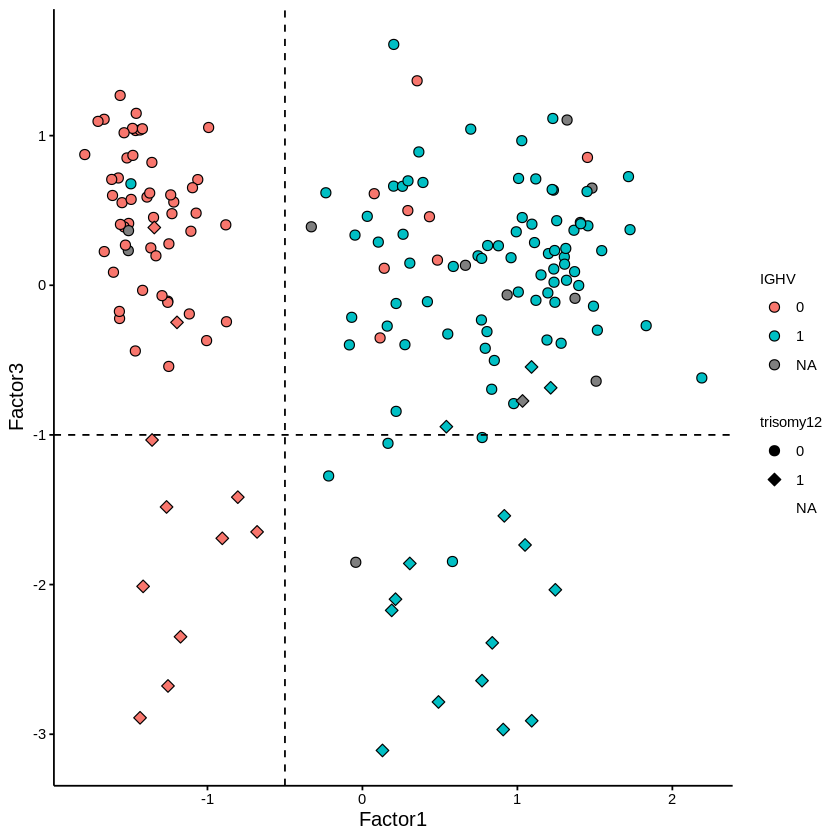

In [49]:
p <- plot_factors(MOFAobject,
  factors = c(1, 3),
  color_by = 'IGHV',
  shape_by = 'trisomy12',
  dot_size = 2.5,
  show_missing = T)

p <- p +
geom_hline(yintercept = -1, linetype='dashed') +
geom_vline(xintercept = (-0.5), linetype='dashed')
print(p)

In [51]:
install.packages('randomForest')
suppressPackageStartupMessages(library(randomForest))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [52]:
# Prepare data
df <- as.data.frame(get_factors(MOFAobject, factors=c(1,2))[[1]])

# Train the model for IGHV
df$IGHV <- as.factor(MOFAobject@samples_metadata$IGHV)
model.ighv <- randomForest(IGHV ~ ., data=df[!is.na(df$IGHV),], ntree=10)
df$IGHV <- NULL

# Do predictions
MOFAobject@samples_metadata$IGHV.pred <- stats::predict(model.ighv, df)

In [53]:
# Train the model for Trisomy12
df$trisomy12 <- as.factor(MOFAobject@samples_metadata$trisomy12)
model.trisomy12 <- randomForest(trisomy12 ~ ., data=df[!is.na(df$trisomy12),], ntree=10)
df$trisomy12 <- NULL

MOFAobject@samples_metadata$trisomy12.pred <- stats::predict(model.trisomy12, df)

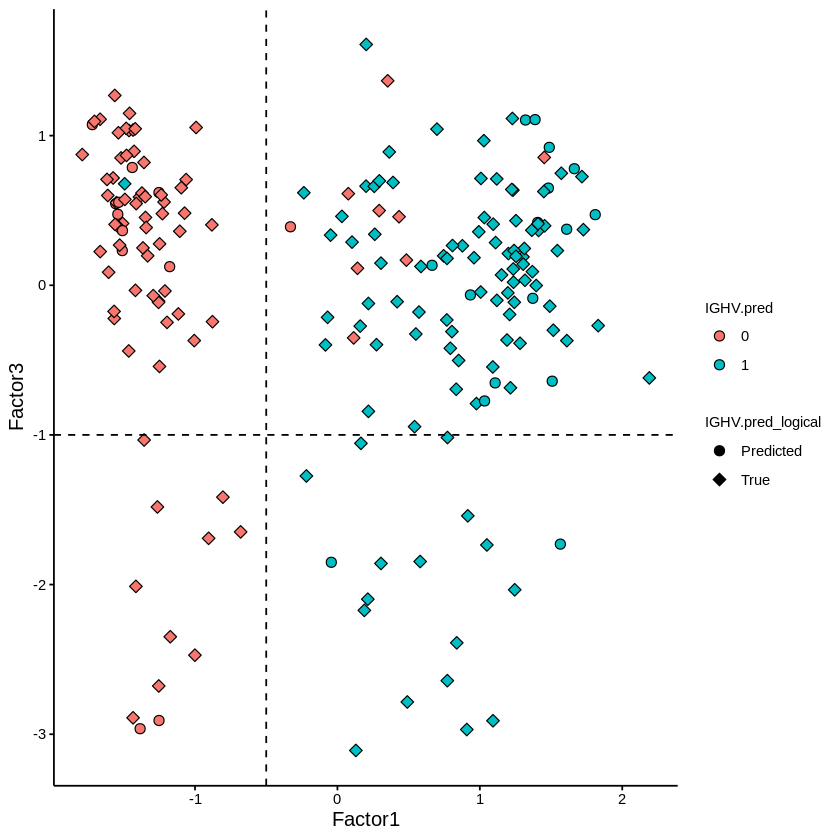

In [54]:
MOFAobject@samples_metadata$IGHV.pred_logical <- c("True","Predicted")[as.numeric(is.na(MOFAobject@samples_metadata$IGHV))+1]

p <- plot_factors(MOFAobject, 
  factors = c(1,3), 
  color_by = "IGHV.pred",
  shape_by = "IGHV.pred_logical",
  dot_size = 2.5,
  show_missing = T
)

p <- p + 
  geom_hline(yintercept=-1, linetype="dashed") +
  geom_vline(xintercept=(-0.5), linetype="dashed")

print(p)

In [55]:
utils::data(reactomeGS)

head(colnames(reactomeGS))

[1] "ENSG00000187634" "ENSG00000188976" "ENSG00000187961" "ENSG00000187583"
[5] "ENSG00000187642" "ENSG00000188290"

In [56]:
head(rownames(reactomeGS))

[1] "Interleukin-6 signaling"                                  
[2] "Apoptosis"                                                
[3] "Hemostasis"                                               
[4] "Intrinsic Pathway for Apoptosis"                          
[5] "Cleavage of Growing Transcript in the Termination Region "
[6] "PKB-mediated events"

In [57]:
res.positive <- run_enrichment(MOFAobject,
  feature.sets = reactomeGS,
  view = 'mRNA',
  sign = 'positive')

res.negative <- run_enrichment(MOFAobject,
  feature.sets = reactomeGS,
  view = 'mRNA',
  sign = 'negative')

Intersecting features names in the model and the gene set annotation results in a total of 4982 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 501 
Set statistic: mean.diff 
Statistical test: parametric 


Subsetting weights with positive sign




Intersecting features names in the model and the gene set annotation results in a total of 4982 features.


Running feature set Enrichment Analysis with the following options...
View: mRNA 
Number of feature sets: 501 
Set statistic: mean.diff 
Statistical test: parametric 


Subsetting weights with negative sign






In [58]:
names(res.positive)

[1] "feature.sets"       "pval"               "pval.adj"          
[4] "feature.statistics" "set.statistics"     "sigPathways"

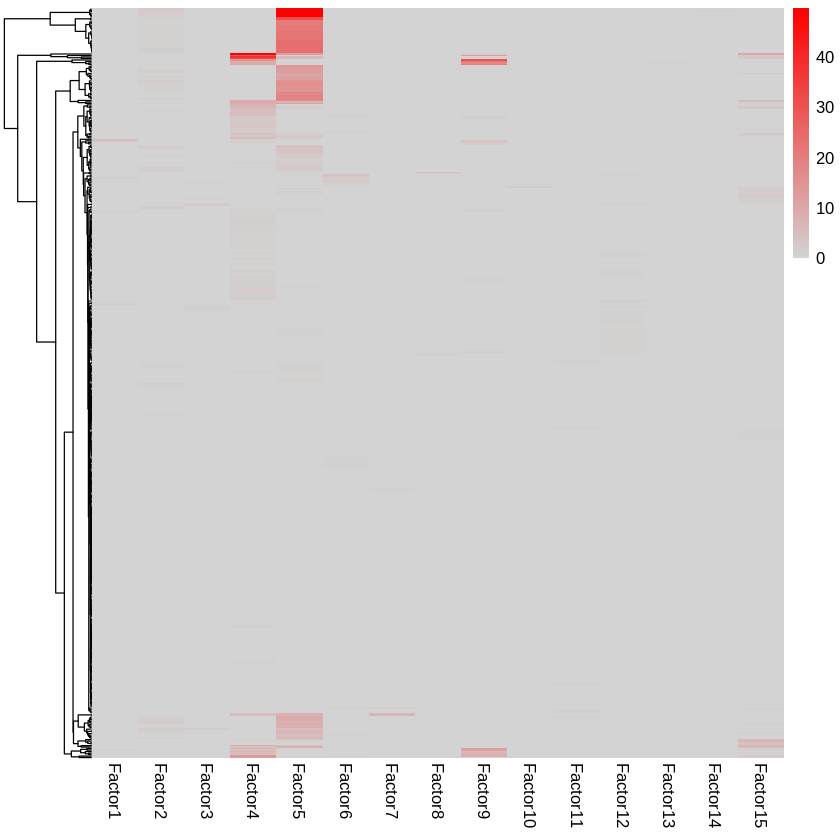

In [59]:
plot_enrichment_heatmap(res.positive)

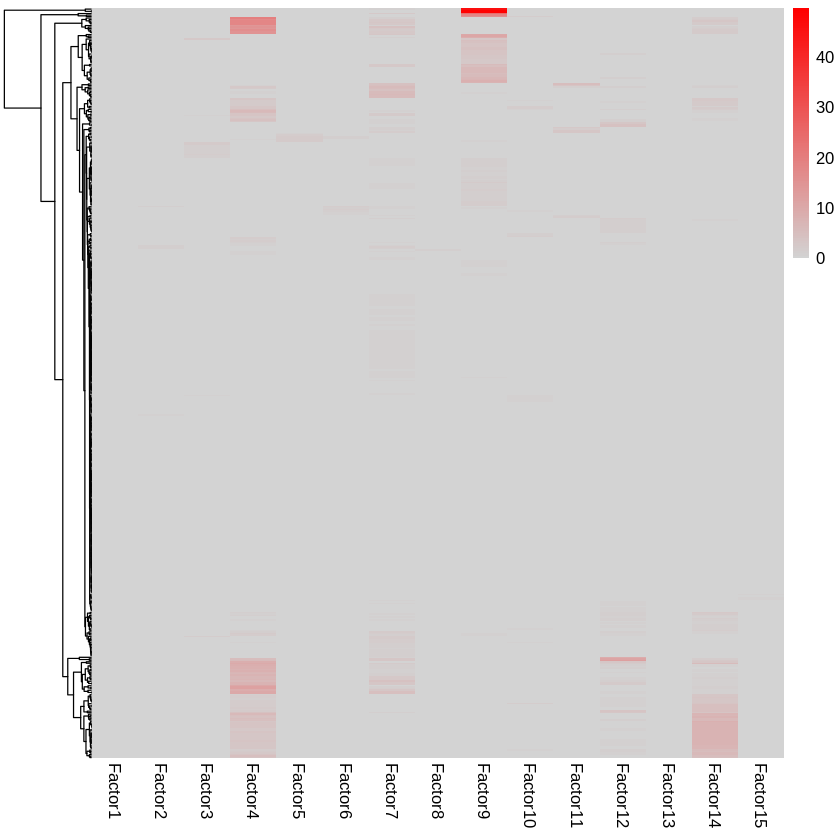

In [60]:
plot_enrichment_heatmap(res.negative)

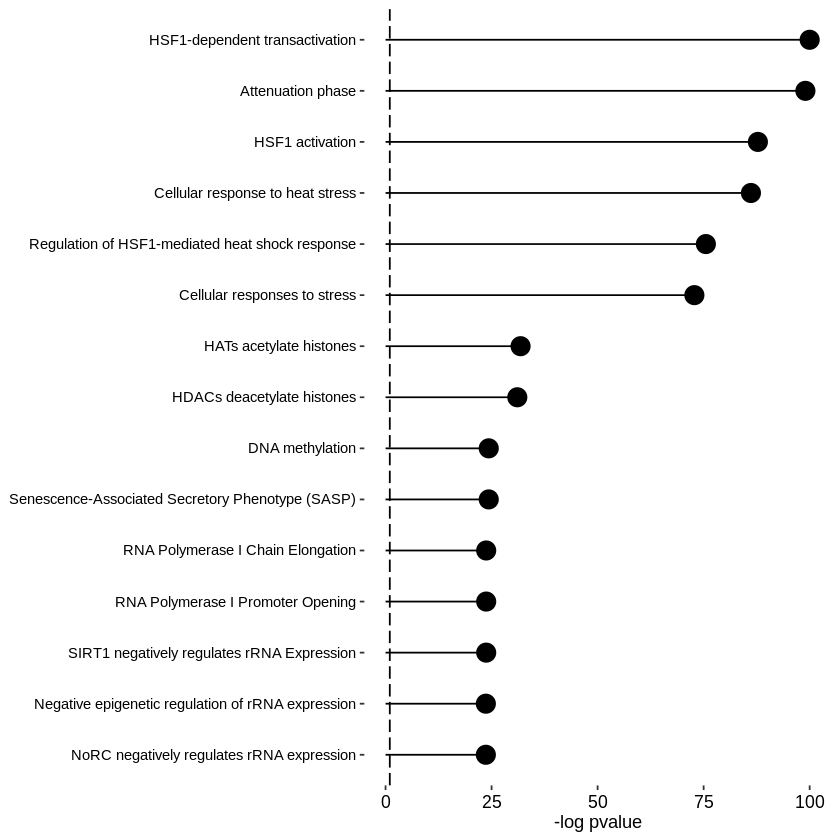

In [61]:
plot_enrichment(res.positive, factor = 5, max.pathways = 15)

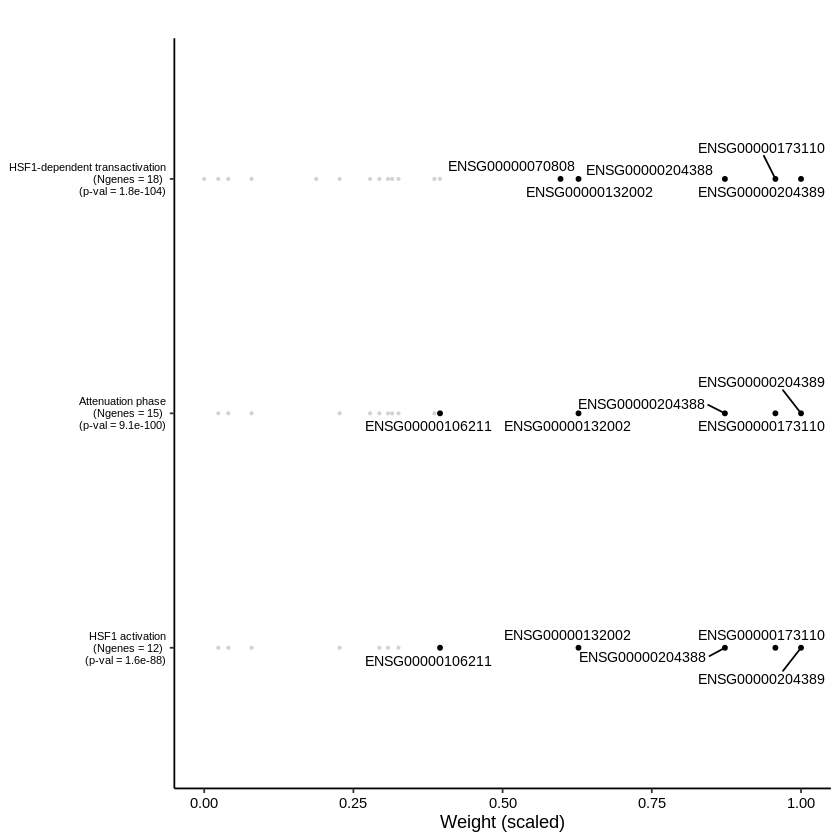

In [62]:
plot_enrichment_detailed(
  enrichment.results = res.positive,
  factor = 5,
  max.pathways = 3
)

In [63]:
weights <- get_weights(MOFAobject, 
  views = "all", 
  factors = "all", 
  as.data.frame = TRUE 
)
head(weights)

feature factor  value         view 
1 D_001_1 Factor1 -0.0001029638 Drugs
2 D_001_2 Factor1 -0.0061835683 Drugs
3 D_001_3 Factor1 -0.0484350338 Drugs
4 D_001_4 Factor1 -0.0396829204 Drugs
5 D_001_5 Factor1 -0.0240856562 Drugs
6 D_002_1 Factor1 -0.0004036970 Drugs

In [64]:
factors <- get_factors(MOFAobject, 
  factors = "all", 
  as.data.frame = TRUE
)
head(factors)

sample factor  value     group 
1 H045   Factor1 -1.418579 group1
2 H109   Factor1 -1.415237 group1
3 H024   Factor1  1.663551 group1
4 H056   Factor1  1.224276 group1
5 H079   Factor1 -1.217420 group1
6 H164   Factor1 -1.791768 group1

In [65]:
data <- get_data(MOFAobject, 
  views = "all", 
  as.data.frame = TRUE
)
head(data)

view  group  feature sample value     
1 Drugs group1 D_001_1 H045   0.02363938
2 Drugs group1 D_001_2 H045   0.04623274
3 Drugs group1 D_001_3 H045   0.31874706
4 Drugs group1 D_001_4 H045   0.82370272
5 Drugs group1 D_001_5 H045   0.89627769
6 Drugs group1 D_002_1 H045   0.09432807

In [66]:
MOFAobject <- impute(MOFAobject)

In [67]:
MOFAobject@data$mRNA[[1]][1:5, 190:195]

H136 H178 H166 H174 H177 H259
ENSG00000244734 NA   NA   NA   NA   NA   NA  
ENSG00000158528 NA   NA   NA   NA   NA   NA  
ENSG00000198478 NA   NA   NA   NA   NA   NA  
ENSG00000175445 NA   NA   NA   NA   NA   NA  
ENSG00000174469 NA   NA   NA   NA   NA   NA

In [71]:
MOFAobject@imputed_data$mRNA[[1]][1:5,190:195]


H136      H178     H166     H174     H177     H259    
ENSG00000244734  8.437186 6.634943 9.558299 4.506726 0.147641 9.142674
ENSG00000158528  7.811139 5.195533 6.924045 6.253729 6.583781 8.099277
ENSG00000198478  8.193635 7.851333 7.285100 7.347293 4.890448 6.041116
ENSG00000175445 10.007591 8.087473 9.101702 9.020709 9.958857 9.480526
ENSG00000174469  9.198478 8.696589 9.370480 7.688797 8.307647 8.521276

In [74]:
install.packages(c('survival', 'survminer'))
library(survival)
library(survminer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘jpeg’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggpubr



In [77]:
SurvObject

  [1] 0.021902806  1.571526352+          NA? 3.074606434+ 0.821355236 
  [6] 1.404517454  1.514031485+ 0.898015058+ 0.919917864+ 1.303216975+
 [11] 2.034223135+ 0.583162218  1.590691307           NA? 3.293634497+
 [16] 0.019164956  0.777549624  0.517453799  0.024640657           NA?
 [21]          NA+ 0.095824778  0.292950034  0.057494867  1.702943190+
 [26]          NA? 1.018480493+ 0.974674880+          NA? 0.427104723 
 [31] 0.043805613  2.600958248+ 0.125941136  0.191649555  0.114989733 
 [36] 2.691307324+ 2.433949350+ 2.576317591+ 3.370294319+ 1.683778234+
 [41]          NA? 1.240246407+ 1.204654346+ 0.016427105  1.579739904+
 [46] 0.257357974  1.125256674  0.019164956  1.702943190+          NA+
 [51] 1.979466119+ 2.376454483+ 0.002737851  0.438056126  0.035592060 
 [56] 0.054757016           NA? 2.833675565+          NA+ 2.932238193+
 [61] 0.002737851  0.090349076  0.021902806  0.046543463  0.265571526 
 [66] 0.013689254           NA+ 0.019164956  2.740588638+          NA?
 [71] 

In [75]:
SurvObject <- Surv(MOFAobject@samples_metadata$TTT, MOFAobject@samples_metadata$treatedAfter)
Z <- get_factors(MOFAobject)[[1]]
fit <- coxph(SurvObject ~ Z)
fit

Call:
coxph(formula = SurvObject ~ Z)

              coef exp(coef) se(coef)      z        p
ZFactor1  -0.43422   0.64777  0.10944 -3.968 7.26e-05
ZFactor2   0.53961   1.71534  0.13380  4.033 5.51e-05
ZFactor3   0.10059   1.10582  0.14057  0.716 0.474259
ZFactor4   0.04846   1.04965  0.10528  0.460 0.645339
ZFactor5   0.27567   1.31741  0.11328  2.434 0.014952
ZFactor6  -0.25121   0.77786  0.12383 -2.029 0.042500
ZFactor7   0.23077   1.25957  0.11332  2.036 0.041709
ZFactor8   0.40083   1.49306  0.10826  3.702 0.000214
ZFactor9  -0.04353   0.95740  0.10580 -0.411 0.680751
ZFactor10 -0.12880   0.87915  0.10962 -1.175 0.240011
ZFactor11  0.54195   1.71935  0.13455  4.028 5.63e-05
ZFactor12 -0.80444   0.44734  0.12448 -6.463 1.03e-10
ZFactor13 -0.12435   0.88307  0.11611 -1.071 0.284175
ZFactor14 -0.05307   0.94831  0.08940 -0.594 0.552783
ZFactor15  0.03688   1.03757  0.12081  0.305 0.760168

Likelihood ratio test=114.6  on 15 df, p=< 2.2e-16
n= 174, number of events= 96 
   (26 observat

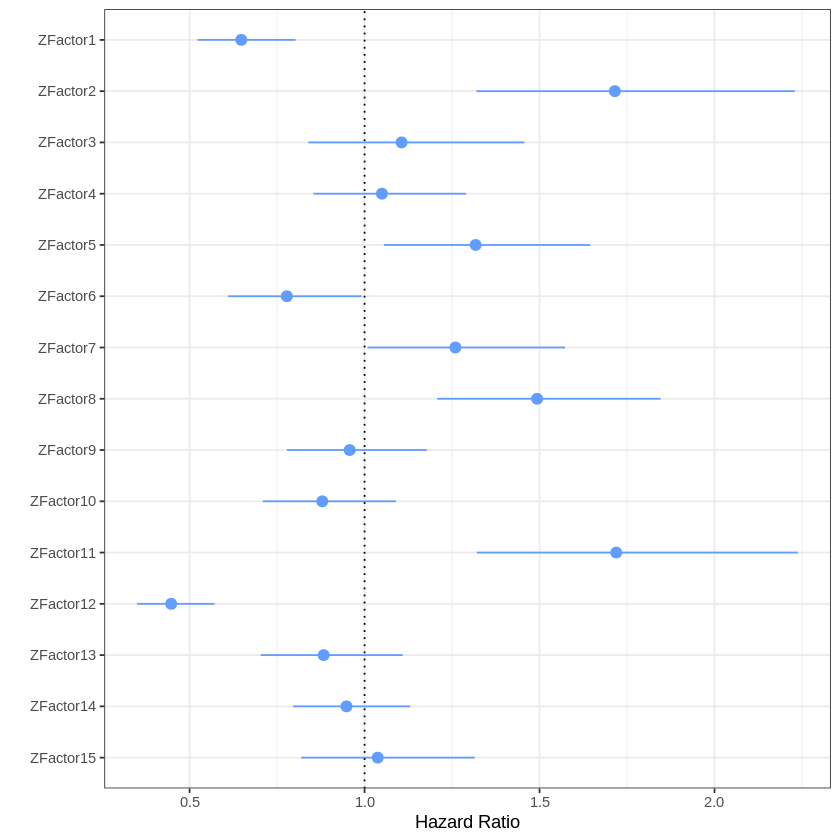

In [76]:
s <- summary(fit)
coef <- s[["coefficients"]]

df <- data.frame(
  factor = factor(rownames(coef), levels = rev(rownames(coef))),
  p      = coef[,"Pr(>|z|)"], 
  coef   = coef[,"exp(coef)"], 
  lower  = s[["conf.int"]][,"lower .95"], 
  higher = s[["conf.int"]][,"upper .95"]
)

ggplot(df, aes(x=factor, y=coef, ymin=lower, ymax=higher)) +
  geom_pointrange( col='#619CFF') + 
  coord_flip() +
  scale_x_discrete() + 
  labs(y="Hazard Ratio", x="") + 
  geom_hline(aes(yintercept=1), linetype="dotted") +
  theme_bw()

In [78]:
df <- data.frame(
  time = SurvObject[, 1],
  event = SurvObject[, 2], Z1 = Z[, 1]
)

cut <- surv_cutpoint(df, variables = 'Z1')
df$FactorCluster <- df$Z1 > cut$cutpoint$cutpoint
fit <- survfit(Surv(time, event) ~ FactorCluster, df)

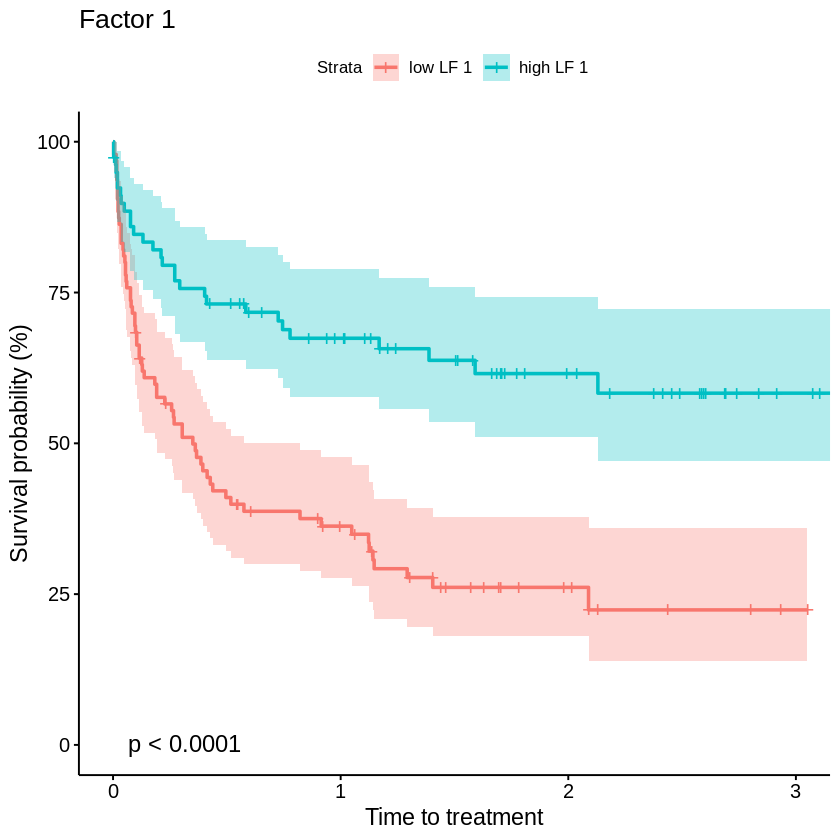

In [80]:
ggsurvplot(fit, data = df,
  conf.int = TRUE, pval = TRUE, 
  fun = function(y) y * 100,
  legend = 'top', legend.labs = c(paste('low LF 1'), 
                                  paste('high LF 1')),
  xlab = 'Time to treatment', ylab = 'Survival probability (%)', title = 'Factor 1')$plot